<a href="https://colab.research.google.com/github/LIONPANJSHIR/ML/blob/main/diabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
source : [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)

###Module

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
### Data
df=pd.read_csv('diabetes.csv')

In [31]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00



* Le jeu de données contient **768 observations**, ce qui en fait un échantillon relativement petit pour une modélisation robuste.
* Aucune valeur manquante explicite n’est détectée à première vue.
* Toutes les variables explicatives sont de type **numérique continue**, tandis que la variable cible est **binaire** :

  * `0` : patiente saine
  * `1` : patiente atteinte de diabète
* Toutefois, certaines incohérences apparaissent dans les données : par exemple, des valeurs **nulles** ou **inhabituelles** pour certaines variables biologiques (ex. taux de glucose = 0, insuline = 0, etc.), ce qui est physiologiquement impossible.
* Ces valeurs pourraient correspondre à :

  * des **valeurs manquantes mal codées** (par des zéros au lieu de NaN),
  * ou à des **erreurs de saisie** lors de la collecte des données.

Il sera donc nécessaire d’**explorer plus en détail** ces anomalies afin de décider d’un traitement approprié :

* remplacer par des valeurs manquantes (NaN),
* imputer (par la médiane, moyenne ou via une méthode avancée),
* ou éventuellement exclure certaines observations si elles sont clairement aberrantes.


Après vérification vérification sur la façon dont les données sont mesuré :
source : voir plus haut
* **Glucose**
  Concentration de glucose plasmatique mesurée 2 heures après un test de tolérance au glucose par voie orale.

* **BloodPressure**
  Pression artérielle diastolique (en mm Hg).

* **SkinThickness**
  Épaisseur du pli cutané du triceps (en mm).

* **Insulin**
  Taux d’insuline sérique mesuré 2 heures après le test (en µU/ml).

* **BMI (Body Mass Index)**
  Indice de masse corporelle, calculé comme *poids en kg / (taille en m)^2*.

* **DiabetesPedigreeFunction**
  Indicateur reflétant la prédisposition génétique au diabète, basé sur les antécédents familiaux.
On arrive a la conclusion que ces variables sont porteuses de valeurs manquantes sauf la variable `DiabetesPedigreeFunction` qui peut prendre des valeurs null



In [34]:
anomalie_df = df[(df["Glucose"] == 0) |
   (df["BloodPressure"] == 0) |
   (df["SkinThickness"] == 0) |
   (df["Insulin"] == 0) |
   (df["BMI"] == 0)]


In [35]:
anomalie_df.shape[0] / df.shape[0]

0.4895833333333333

376/768 soit 48.95% des  observations contiennent des valeurs << physiologiquement impossible>>

In [36]:
# df.loc[:, ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan, inplace=True)

In [37]:
# from missingno import matrix
# # matrix(df)
# df.isnull().sum()

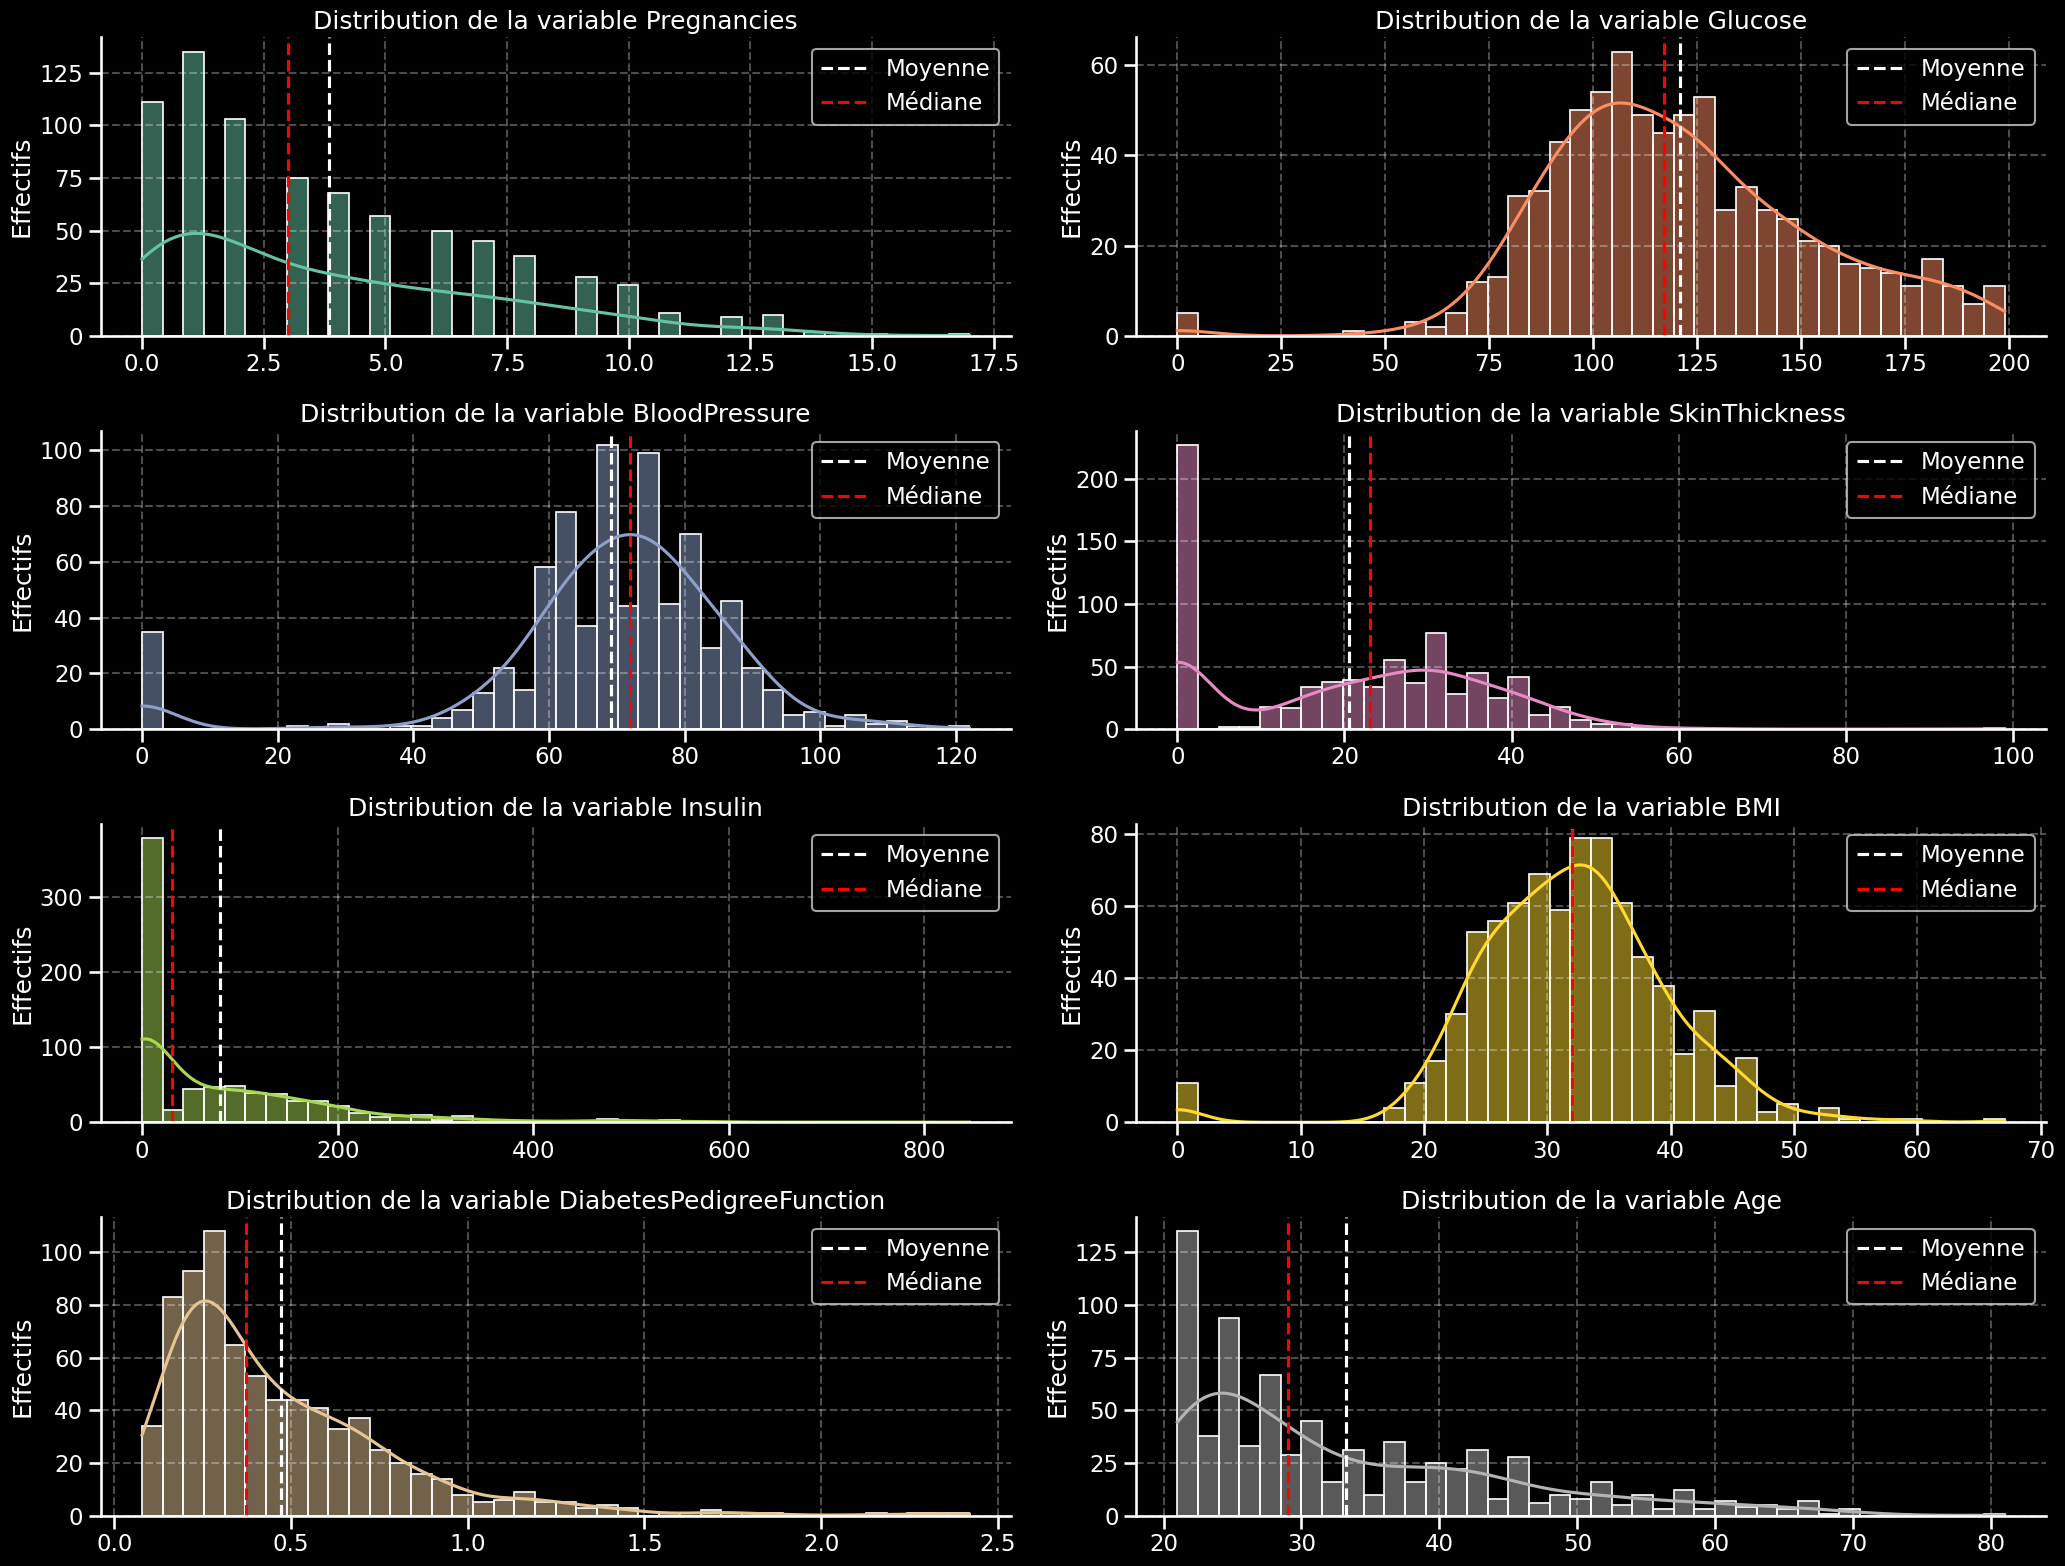

In [38]:
plt.style.use("dark_background")

fig , ax = plt.subplots(nrows=4, ncols=2, figsize=(21,16))
colors = sns.color_palette("Set2", n_colors=8)
axes = ax.ravel()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=40, color=colors[i])
    mean = df[col].mean()
    median = df[col].median()

    # titres et labels
    axes[i].set_title(f"Distribution de la variable {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Effectifs")

    # moyenne et median
    axes[i].axvline(mean, color="white", linestyle="--", label="Moyenne")
    axes[i].axvline(median, color="red", linestyle="--", label="Médiane")
    axes[i].legend()

    # grilles
    axes[i].xaxis.grid(True, ls="--", alpha=0.3)
    axes[i].yaxis.grid(True, ls="--", alpha=0.3)

    # suppression uniquement des bordures haut et droite
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

fig.tight_layout()
plt.show()


In [39]:
# plt.style.use("dark_background")

# fig , ax = plt.subplots(nrows=4, ncols=2, figsize=(21,16))
# colors = sns.color_palette("Set2", n_colors=8)
# axes = ax.ravel()
# cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
# df_mis = df.copy()
# df_mis[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)


# for i, col in enumerate(df_mis.columns[:-1]):
#     sns.histplot(data=df_mis, x=col, ax=axes[i], kde=True, bins=40, color=colors[i])
#     mean = df[col].mean()
#     median = df[col].median()

#     # titres et labels
#     axes[i].set_title(f"Distribution de la variable {col}")
#     axes[i].set_xlabel("")
#     axes[i].set_ylabel("Effectifs")

#     # moyenne et median
#     axes[i].axvline(mean, color="white", linestyle="--", label="Moyenne")
#     axes[i].axvline(median, color="red", linestyle="--", label="Médiane")
#     axes[i].legend()

#     # grilles
#     axes[i].xaxis.grid(True, ls="--", alpha=0.3)
#     axes[i].yaxis.grid(True, ls="--", alpha=0.3)

#     # suppression uniquement des bordures haut et droite
#     axes[i].spines["top"].set_visible(False)
#     axes[i].spines["right"].set_visible(False)

# fig.tight_layout()
# plt.show()


### Interprétation des Distributions

Les graphiques de distribution révèlent plusieurs points clés concernant les variables du jeu de données :

*   **Asymétrie :** Plusieurs variables (Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction et Age) présentent une asymétrie marquée vers la droite (longue traîne à droite). Les variables BMI et BloodPressure semblent plus proches d'une distribution normale, tandis que la variable Glucose montre une légère asymétrie vers la gauche.
* Les variables n'ont pas la même échelle
*   **Valeurs nulles (0) :** Les valeurs de 0 observées dans BloodPressure, SkinThickness, Insulin et BMI sont probablement des valeurs manquantes ou des erreurs, car elles ne sont pas physiologiquement possibles. Ces valeurs devront être traitées lors de la phase de prétraitement des données.


In [40]:
df.groupby("Outcome").agg(["mean", "median"])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000    2.0  109.980000  107.0     68.184000   70.0   
1          4.865672    4.0  141.257463  140.0     70.824627   74.0   

        SkinThickness            Insulin               BMI         \
                 mean median        mean median       mean median   
Outcome                                                             
0           19.664000   21.0   68.792000   39.0  30.304200  30.05   
1           22.164179   27.0  100.335821    0.0  35.142537  34.25   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.429734  0.336  31.190000   27.0  
1                       0.550500  0.449  37.067164   36.0

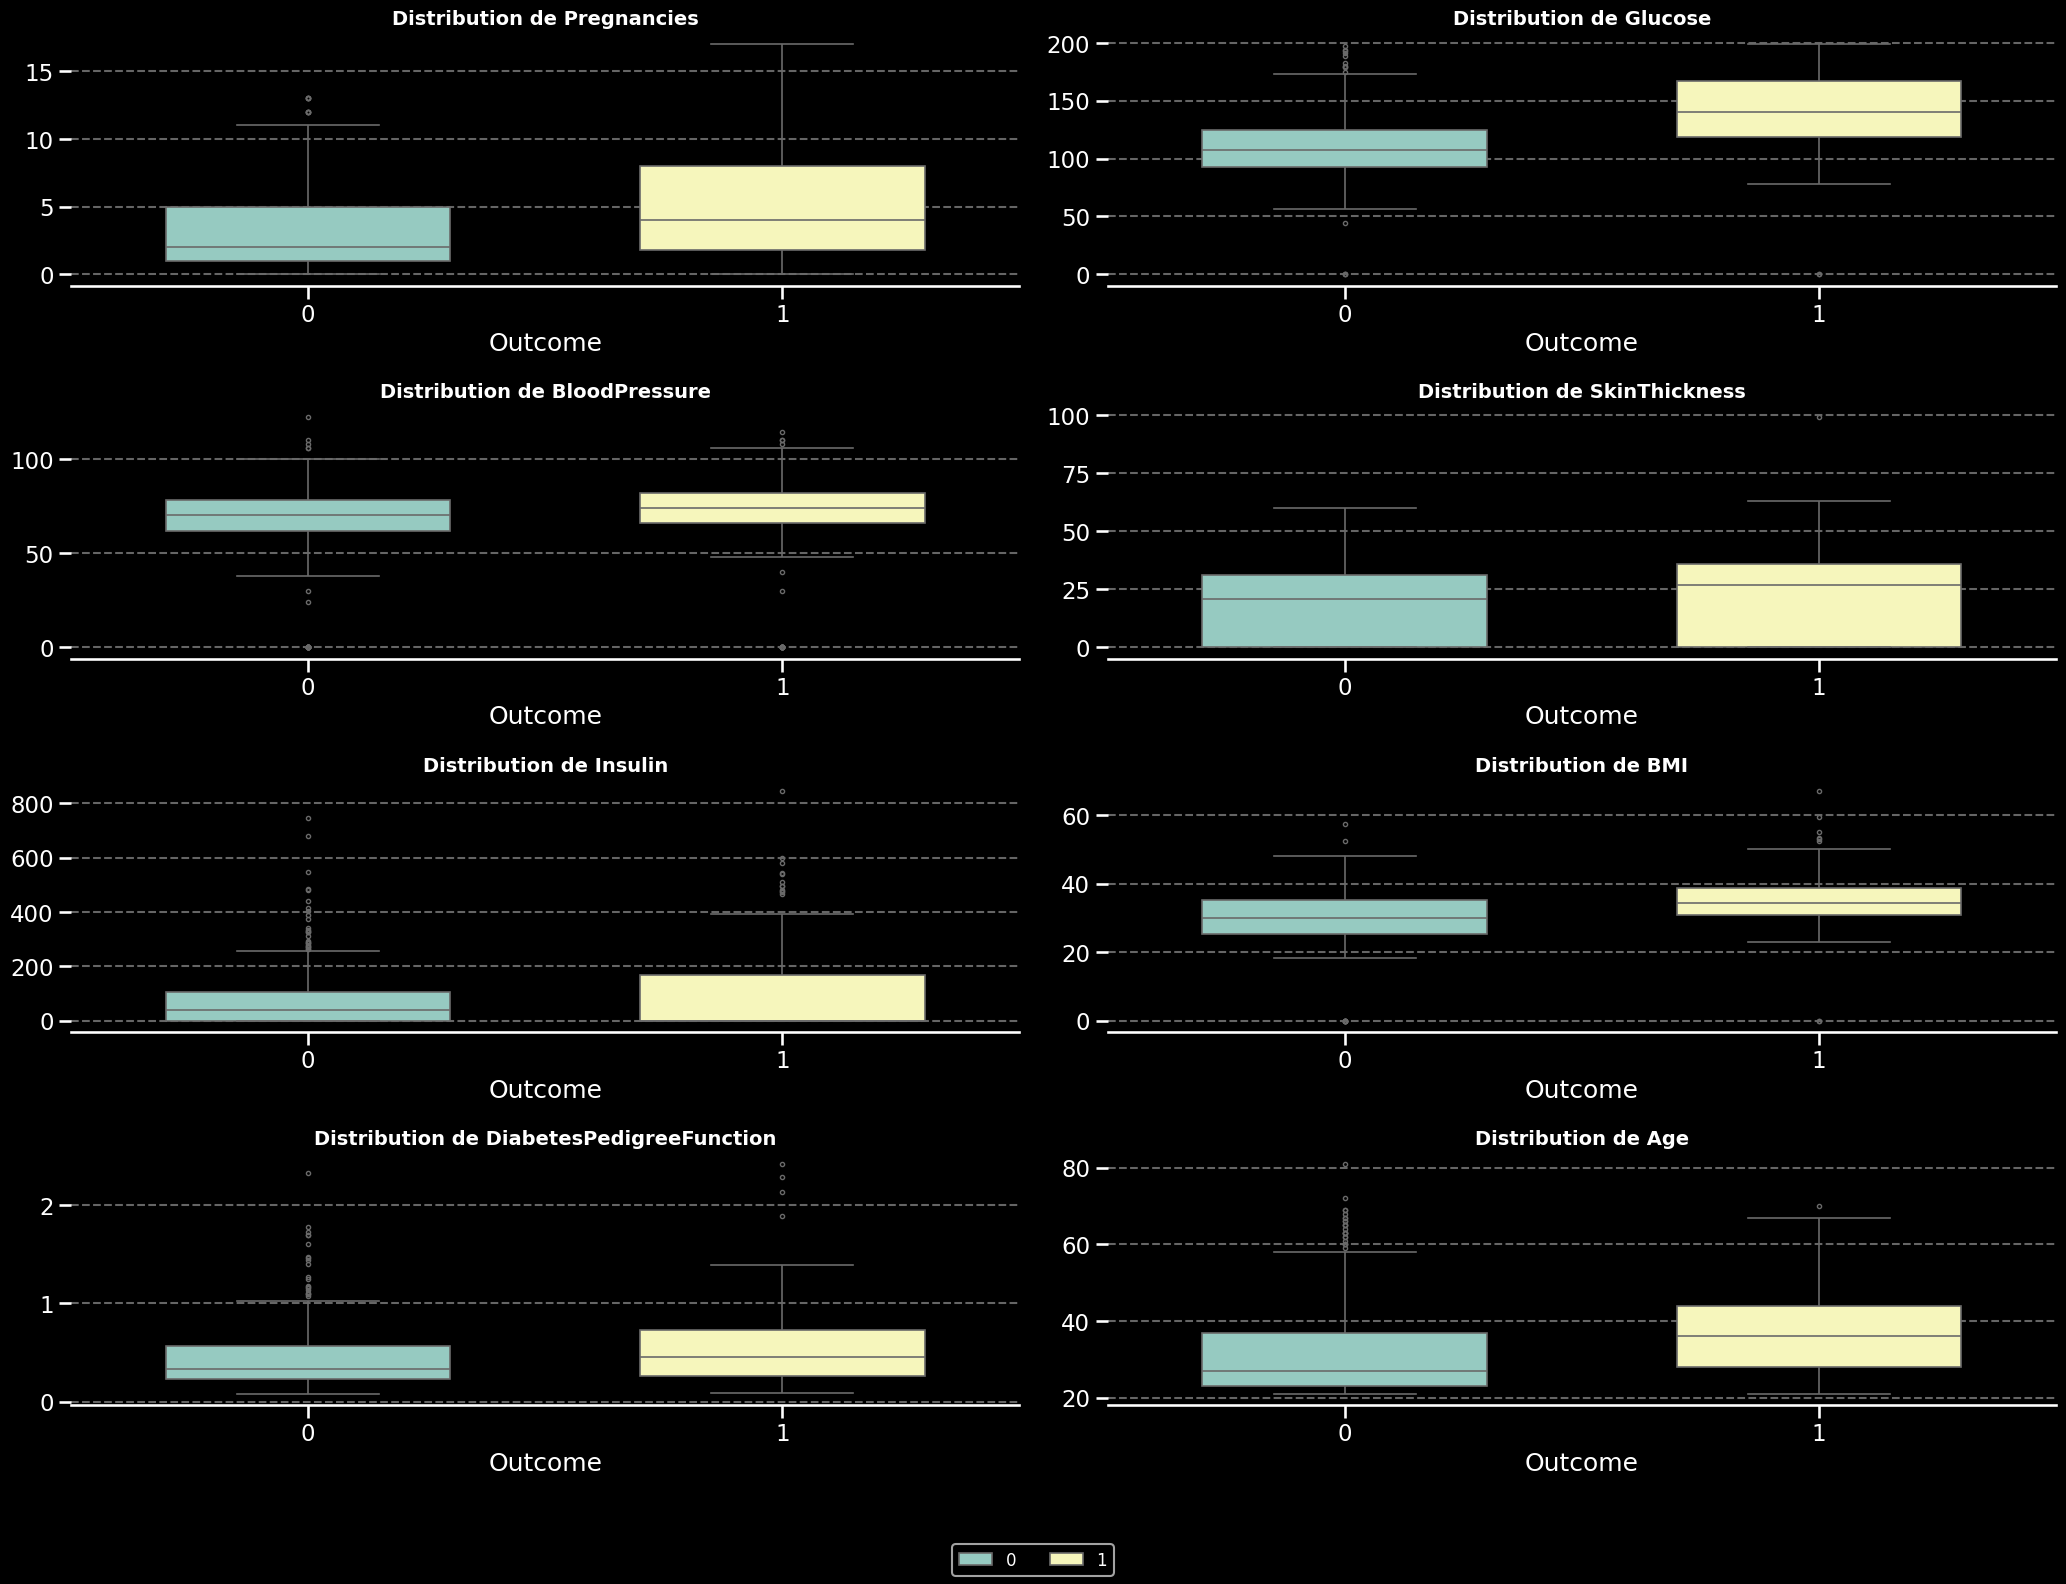

In [41]:
plt.style.use("dark_background")
sns.set_context("talk")

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(21,16))
axes = ax.ravel()

for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(data=df, y=col, x="Outcome", ax=axes[i], hue="Outcome",
                palette="Set3", width=0.6, fliersize=3, linewidth=1.2)

    # titre et labels
    axes[i].set_title(f"Distribution de {col}", fontsize=14, fontweight="bold")
    axes[i].set_xlabel("Outcome")
    axes[i].set_ylabel("")
    axes[i].legend().set_visible(False)

    # suppression bordures superflues
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["left"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

    # grilles légères pour aider à lire
    axes[i].yaxis.grid(True, ls="--", alpha=0.4)

# légende globale (placée en bas)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", fontsize=12, ncol=2)

fig.tight_layout(rect=[0, 0.05, 1, 1])  # laisse de la place pour la légende en bas
plt.show()


### Interprétation des Box Plots

Les box plots nous permettent de comparer la distribution de chaque variable explicative entre les deux groupes de la variable cible (Outcome : 0 pour non diabétique, 1 pour diabétique). Voici les observations clés :

*   **Pregnancies :** Le nombre de grossesses est généralement plus élevé chez les femmes diabétiques (Outcome=1) comparé aux non diabétiques (Outcome=0).
*   **Glucose :** Il existe une différence significative dans les niveaux de glucose entre les deux groupes. Les femmes diabétiques ont des niveaux de glucose nettement plus élevés.
*   **BloodPressure :** La pression artérielle est légèrement plus élevée chez les femmes diabétiques, mais le chevauchement des boîtes suggère que cette variable est moins discriminante seule.
*   **SkinThickness :** L'épaisseur de la peau montre une légère tendance à être plus élevée chez les diabétiques, mais avec un chevauchement important entre les groupes.
*   **Insulin :** Les niveaux d'insuline sont considérablement plus élevés chez les femmes diabétiques. La présence de nombreuses valeurs nulles dans le groupe non diabétique est également visible.
*   **BMI :** L'indice de masse corporelle est clairement plus élevé chez les femmes diabétiques.
*   **DiabetesPedigreeFunction :** Cette fonction montre des valeurs plus élevées chez les femmes diabétiques, indiquant un risque accru basé sur les antécédents familiaux.
*   **Age :** Les femmes diabétiques sont en moyenne plus âgées que les femmes non diabétiques.

En conclusion, les variables Glucose, BMI et Age semblent être les plus discriminantes pour différencier les femmes diabétiques des non diabétiques. Les box plots confirment également la présence de valeurs nulles et d'outliers qui nécessiteront un traitement.

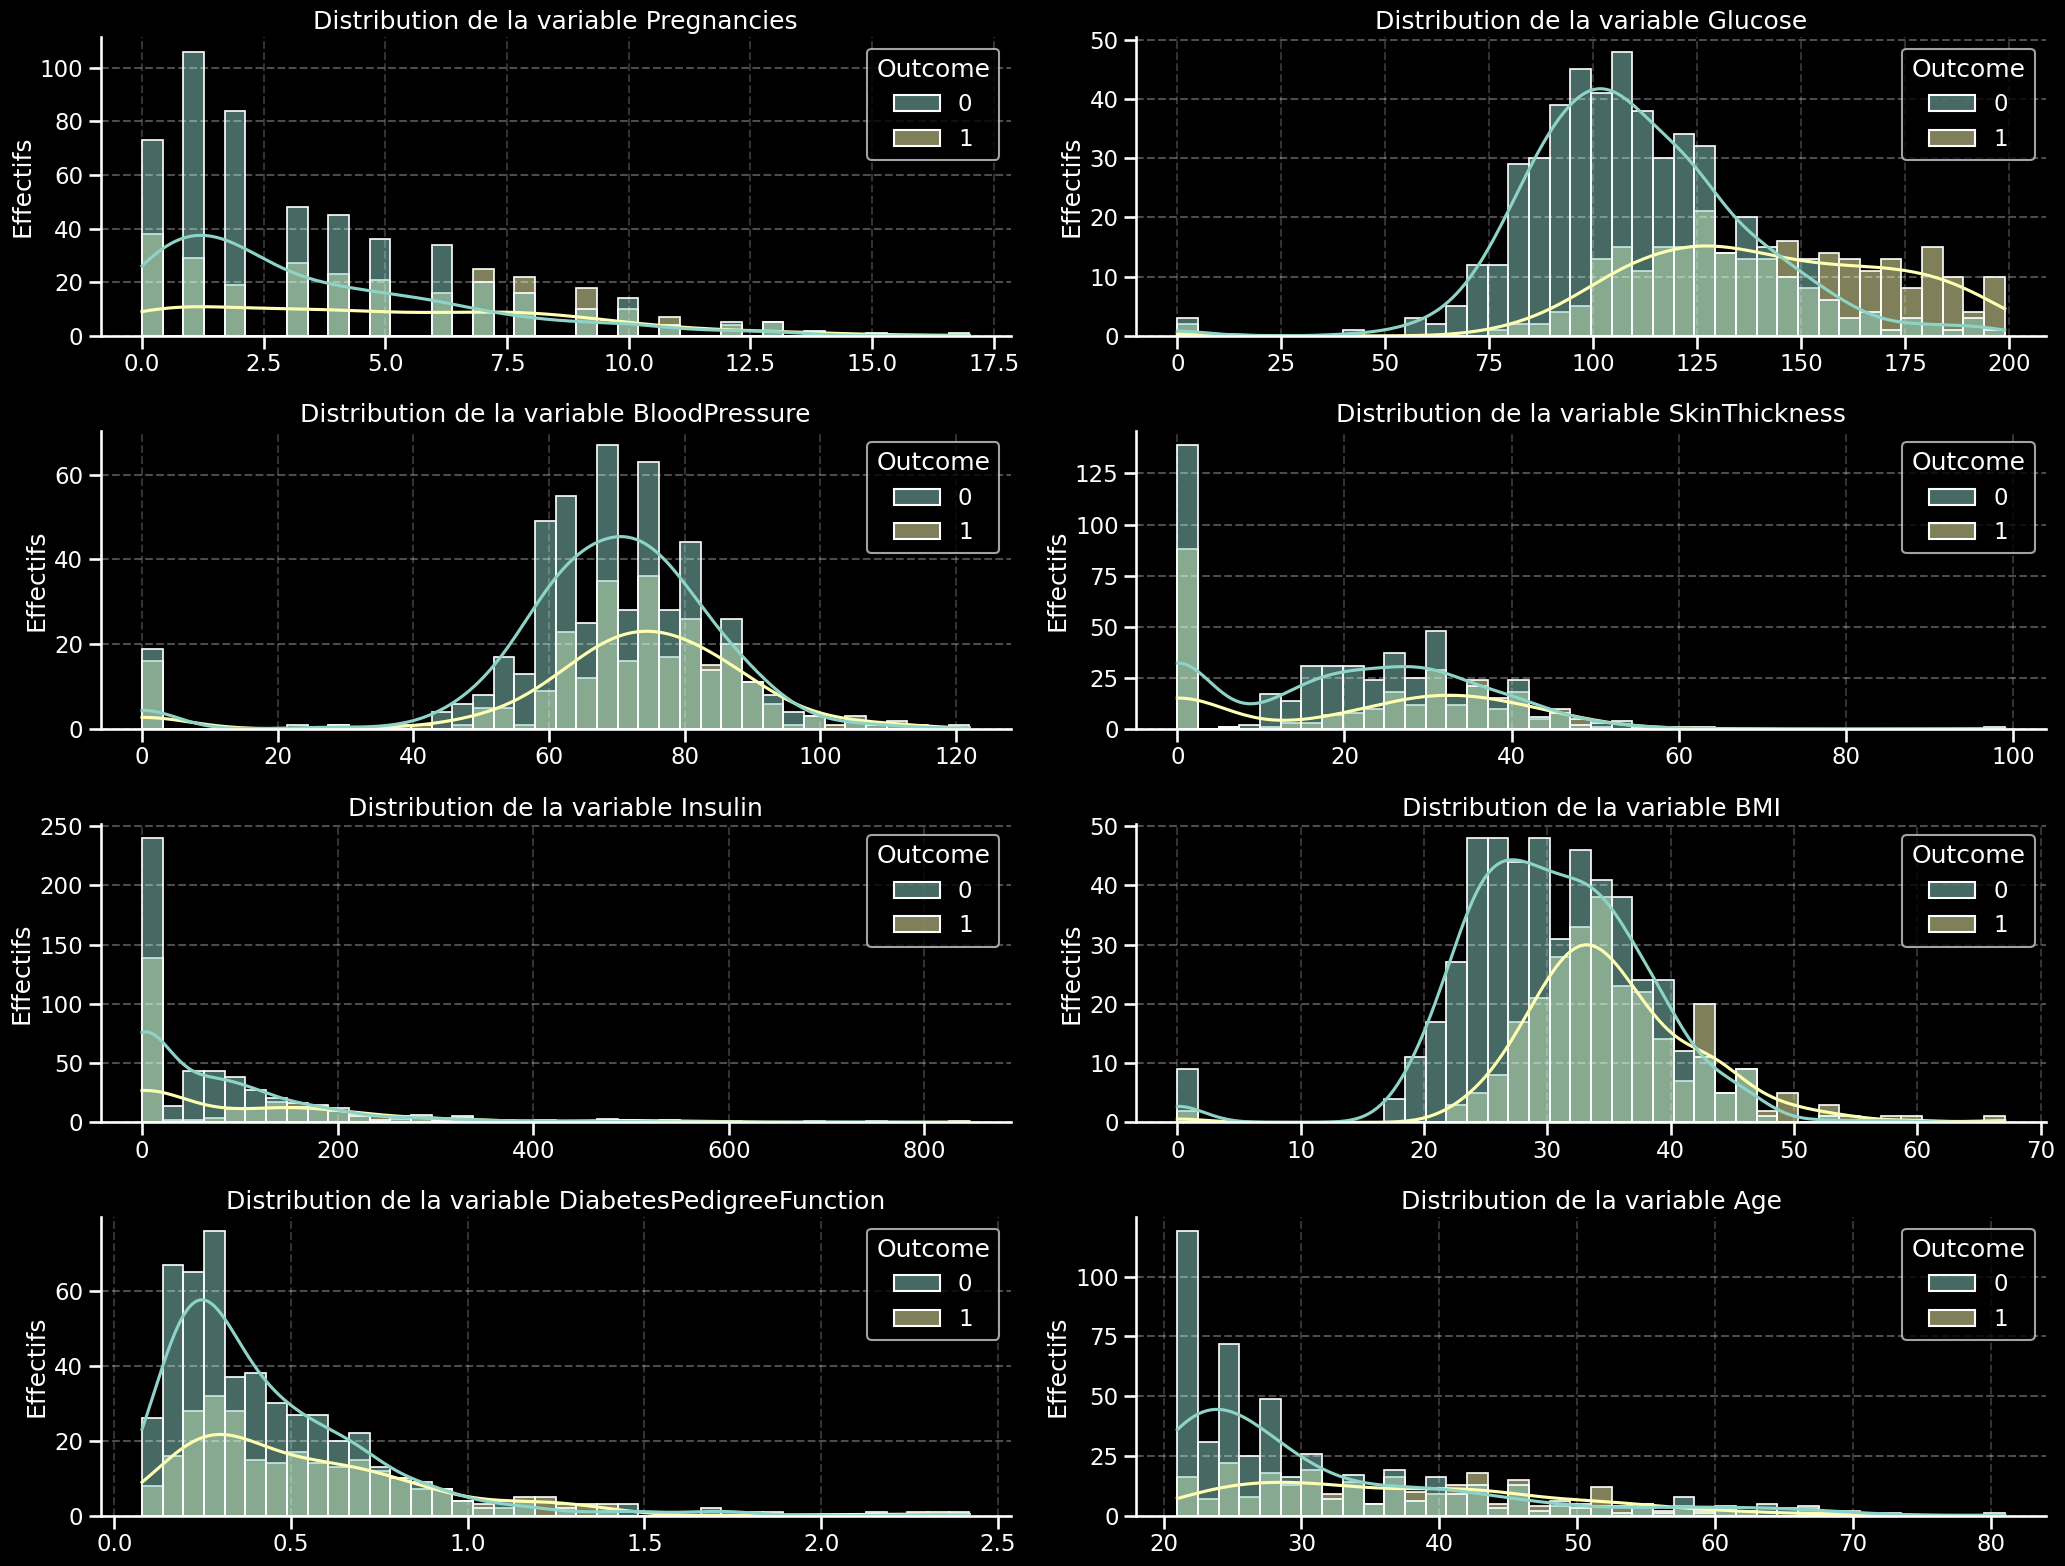

In [42]:
plt.style.use("dark_background")

fig , ax = plt.subplots(nrows=4, ncols=2, figsize=(21,16))
colors = sns.color_palette("Set2", n_colors=8)
axes = ax.ravel()

for i, col in enumerate(df.columns[:-1]):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=40, color=colors[i],hue="Outcome")

    # titres et labels
    axes[i].set_title(f"Distribution de la variable {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Effectifs")

    # grilles
    axes[i].xaxis.grid(True, ls="--", alpha=0.2)
    axes[i].yaxis.grid(True, ls="--", alpha=0.3)

    # suppression uniquement des bordures haut et droite
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

fig.tight_layout()
plt.show()


### Interprétation des Distributions en fonction de la variabe cible ( Outcome )

Ce graphique montre les distributions de chaque variable explicative (sauf la variable cible) séparées en fonction de la variable "Outcome" (0 pour non diabétique, 1 pour diabétique) à l'aide d'histogrammes et de courbes de densité (KDE). Cela nous permet de comparer visuellement les caractéristiques de chaque variable entre les deux groupes.

Voici une synthèse des observations :

*   **Variables avec une bonne séparation :** Les distributions de **Glucose**, **BMI** (Indice de Masse Corporelle) et **Age** montrent une séparation notable entre les groupes non diabétique et diabétique. Les femmes diabétiques ont tendance à avoir des valeurs plus élevées pour ces trois variables, ce qui suggère qu'elles sont de bons indicateurs potentiels de diabète.
*   **Variables avec un chevauchement important :** Les distributions de **BloodPressure** (Pression Artérielle), **SkinThickness** (Épaisseur de la peau) et **DiabetesPedigreeFunction** montrent un chevauchement plus important entre les deux groupes. Bien qu'il y ait des tendances (légèrement plus élevées chez les diabétiques), ces variables seules sont moins discriminantes.
*   **Variables avec des valeurs nulles importantes :** Les histogrammes de **BloodPressure**, **SkinThickness**, **Insulin** et **BMI** confirment la présence de nombreuses valeurs égales à 0. Ces zéros sont particulièrement concentrés dans le groupe non diabétique pour l'Insulin et le SkinThickness, et présents dans les deux groupes pour BloodPressure et BMI (Observés précédemment).
*   **Pregnancies :** La distribution des grossesses est légèrement décalée vers la droite pour le groupe diabétique, indiquant un nombre de grossesses plus élevé en moyenne.
*   **Insulin :** Au-delà des valeurs de 0, la distribution de l'insuline est plus étendue vers des valeurs élevées chez les femmes diabétiques, bien qu'avec un chevauchement important.

Ce graphique renforce l'idée que le Glucose, le BMI et l'Age sont les prédicteurs les plus prometteurs. Il met également en évidence le problème des valeurs nulles (probablement manquantes) dans plusieurs variables, ce qui sera une étape cruciale du prétraitement des données.

## Matrice de corrélations

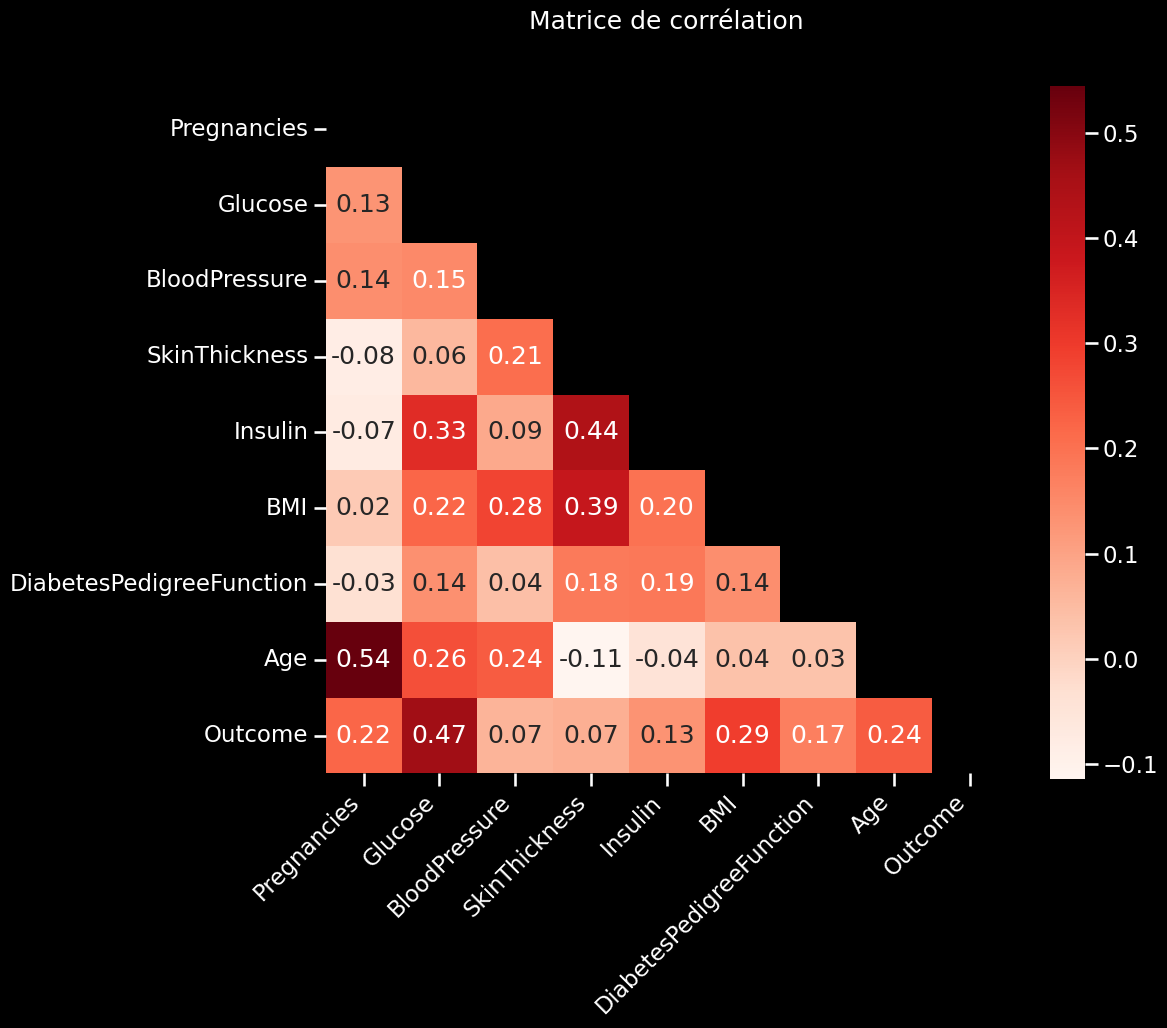

In [43]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Reds', annot=True, fmt=".2f",
            square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Matrice de corrélation",pad=45)

# cbar = ax.collections[0].colorbar
# cbar.ax.set_position([0.35, 0.30, 0.3, 0.6])  # [x, y, largeur, hauteur]
plt.show()

### Interprétation de la Matrice de Corrélation

La matrice de corrélation de Pearson montre les relations linéaires entre chaque paire de variables. Les valeurs vont de -1 (corrélation négative parfaite) à 1 (corrélation positive parfaite), avec 0 indiquant l'absence de corrélation linéaire.

Points clés :

*   **Corrélations avec la variable cible (Outcome) :**
    *   `Glucose` (0.47) présente la corrélation positive la plus forte avec l'Outcome. Un niveau de glucose élevé est un indicateur clé de diabète.
    *   `BMI` (0.29) et `Age` (0.24) montrent des corrélations positives modérées avec l'Outcome.
    *   `Pregnancies` (0.22) et `DiabetesPedigreeFunction` (0.17) ont des corrélations positives plus faibles.
    *   `Insulin` (0.13), `BloodPressure` (0.07) et `SkinThickness` (0.07) ont de très faibles corrélations avec l'Outcome, suggérant qu'elles sont moins directement liées au diagnostic de diabète dans ce jeu de données.

*   **Corrélations entre variables explicatives :**
    *   `Pregnancies` et `Age` sont modérément corrélées (0.54), ce qui est attendu.
    *   `SkinThickness` et `Insulin` montrent une corrélation modérée à forte (0.44).
    *   `BMI` est modérément corrélé avec `SkinThickness` (0.39) et `Glucose` (0.22).
    *   `Glucose` est également modérément corrélé avec `Insulin` (0.33).

Cette analyse de corrélation renforce l'idée que `Glucose`, `BMI` et `Age` sont les prédicteurs les plus pertinents pour la modélisation. Elle met également en évidence des interdépendances entre certaines variables explicatives qu'il faudra considérer lors du choix et de l'ajustement du modèle.

/tmp/ipython-input-483613075.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cov = (cov > 0 ).replace({True: 1, False: 0})


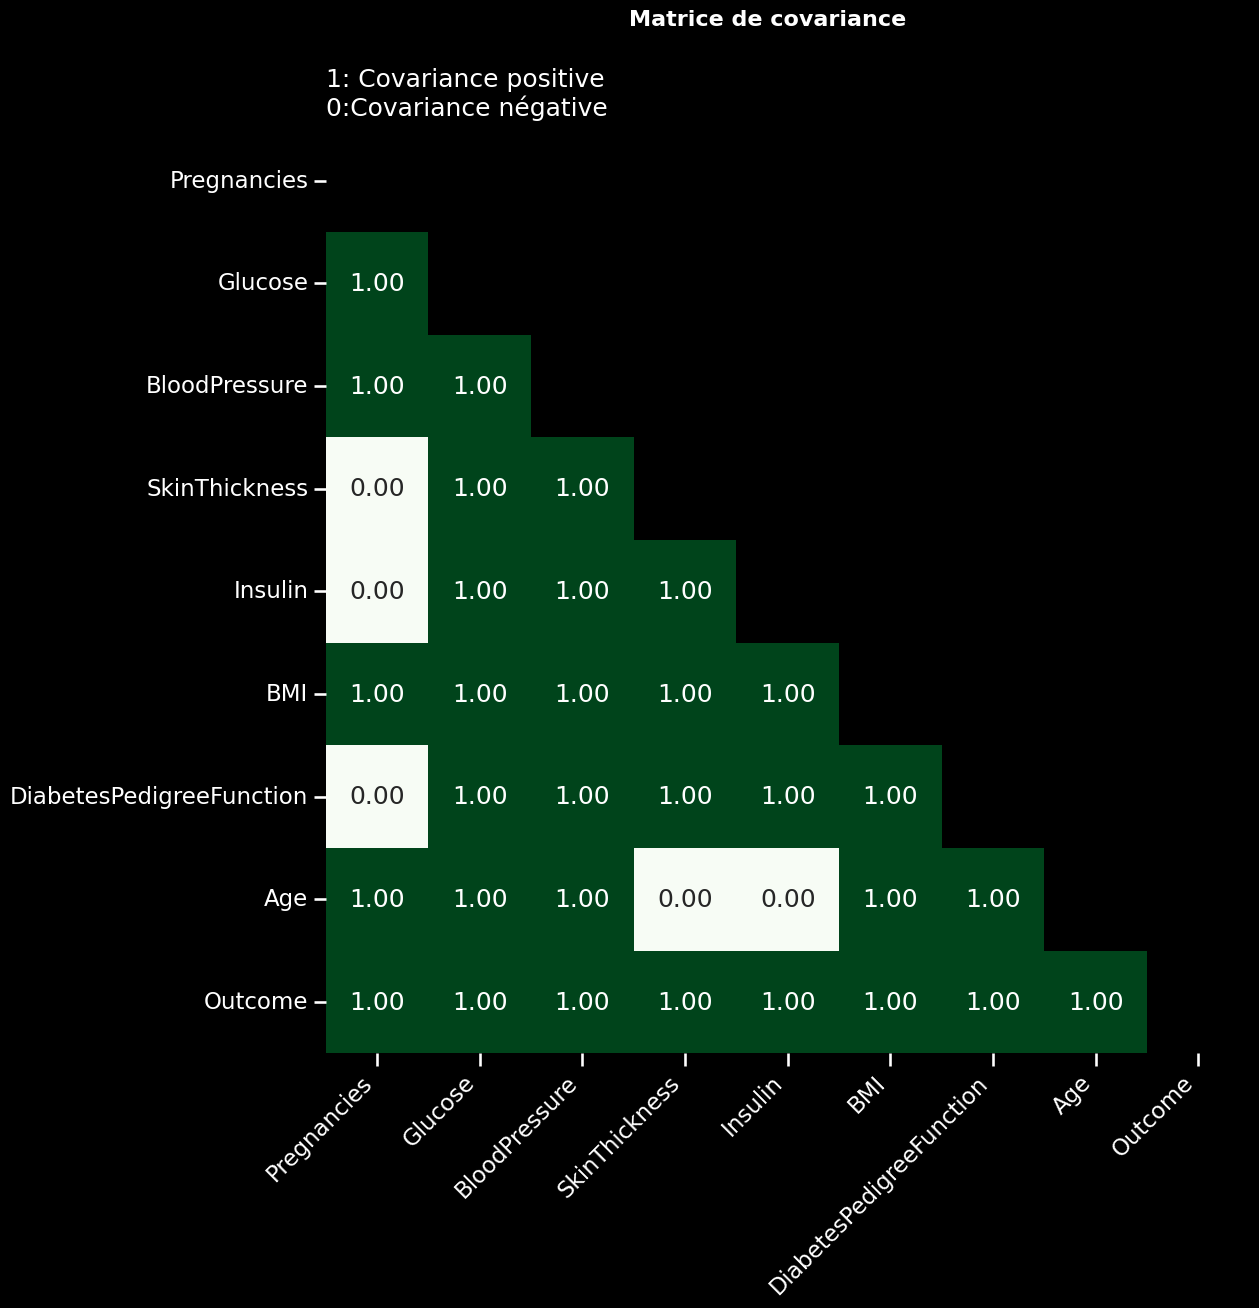

In [44]:


# Matrice de covariance
cov = df.cov()
cov = (cov > 0 ).replace({True: 1, False: 0})

# Masque triangulaire
mask = np.triu(np.ones_like(cov, dtype=bool))

# Heatmap
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(
    cov, mask=mask, cmap="Greens", annot=True, fmt=".2f",
    square=True, cbar = False
)

# Rotation et titre
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title("1: Covariance positive \n0:Covariance négative", pad=10,loc="left")
f.suptitle("Matrice de covariance", fontsize=16, fontweight="bold")

plt.show()


In [45]:
# (cov > 0).replace({True: "+", False: "-"})

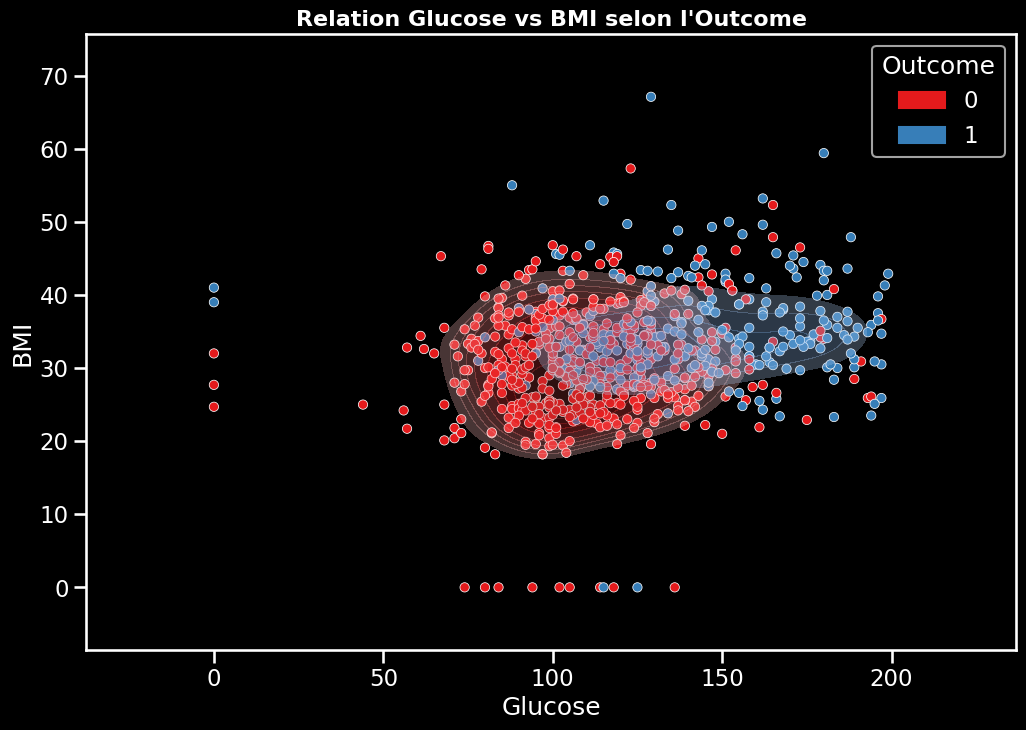

In [46]:
f, ax = plt.subplots(figsize=(12, 8))
s=df["Glucose"]/df["BMI"]
# Scatter
sns.scatterplot(
    data=df,
    x="Glucose", y="BMI", hue="Outcome", ax=ax,s=45 , palette="Set1"
)

# KDE 2D par catégorie
sns.kdeplot(
    data=df,
    x="Glucose", y="BMI", hue="Outcome",palette="Set1",
    fill=True, thresh=0.3, alpha=0.3, ax=ax
)

# Titre & style
ax.set_title("Relation Glucose vs BMI selon l'Outcome", fontsize=16, weight="bold")
plt.show()


### Interprétation de la Relation Glucose vs BMI selon l'Outcome

Ce graphique combine un nuage de points (scatterplot) et des estimations de densité de noyau (KDE - Kernel Density Estimate) pour visualiser la relation entre le Glucose et le BMI, différenciée par la variable cible "Outcome" (0 pour non diabétique, 1 pour diabétique).

Points clés :

* **Séparation des Groupes :** Le graphique montre une séparation claire entre les groupes non diabétique (rouge) et diabétique (bleu) en fonction des valeurs de Glucose et de BMI. Les femmes diabétiques (Outcome=1) ont tendance à se situer dans la partie supérieure droite du graphique, avec des niveaux de Glucose et des valeurs de BMI plus élevés. Les femmes non diabétiques (Outcome=0) sont plus concentrées dans la partie inférieure gauche.
* **Densités :** Les zones de densité (représentées par les contours) confirment cette séparation. La densité des femmes diabétiques est concentrée autour de valeurs de Glucose et de BMI plus élevées que celle des femmes non diabétiques. Il y a un certain chevauchement entre les deux densités, en particulier dans la zone où les valeurs de Glucose et de BMI sont intermédiaires, ce qui est attendu dans un problème de classification.
* **Outliers :** Les points individuels (scatterplot) mettent en évidence la distribution réelle des données et la présence de quelques valeurs extrêmes (outliers), notamment pour les femmes diabétiques qui peuvent avoir des valeurs de Glucose très élevées. Les valeurs nulles (0) pour le Glucose et le BMI, mentionnées précédemment, sont également visibles sur le graphique.
* **Interaction des Variables :** Le graphique suggère que ni le Glucose ni le BMI seuls ne sont des prédicteurs parfaits, mais leur combinaison est beaucoup plus discriminante. Une patiente avec un Glucose élevé *et* un BMI élevé a une probabilité plus élevée d'être diabétique.

En résumé, ce graphique confirme visuellement que le Glucose et le BMI sont des variables importantes pour prédire le diabète et qu'elles ont un effet combiné significatif. Il souligne également la nécessité de traiter les valeurs nulles identifiées dans ces variables.

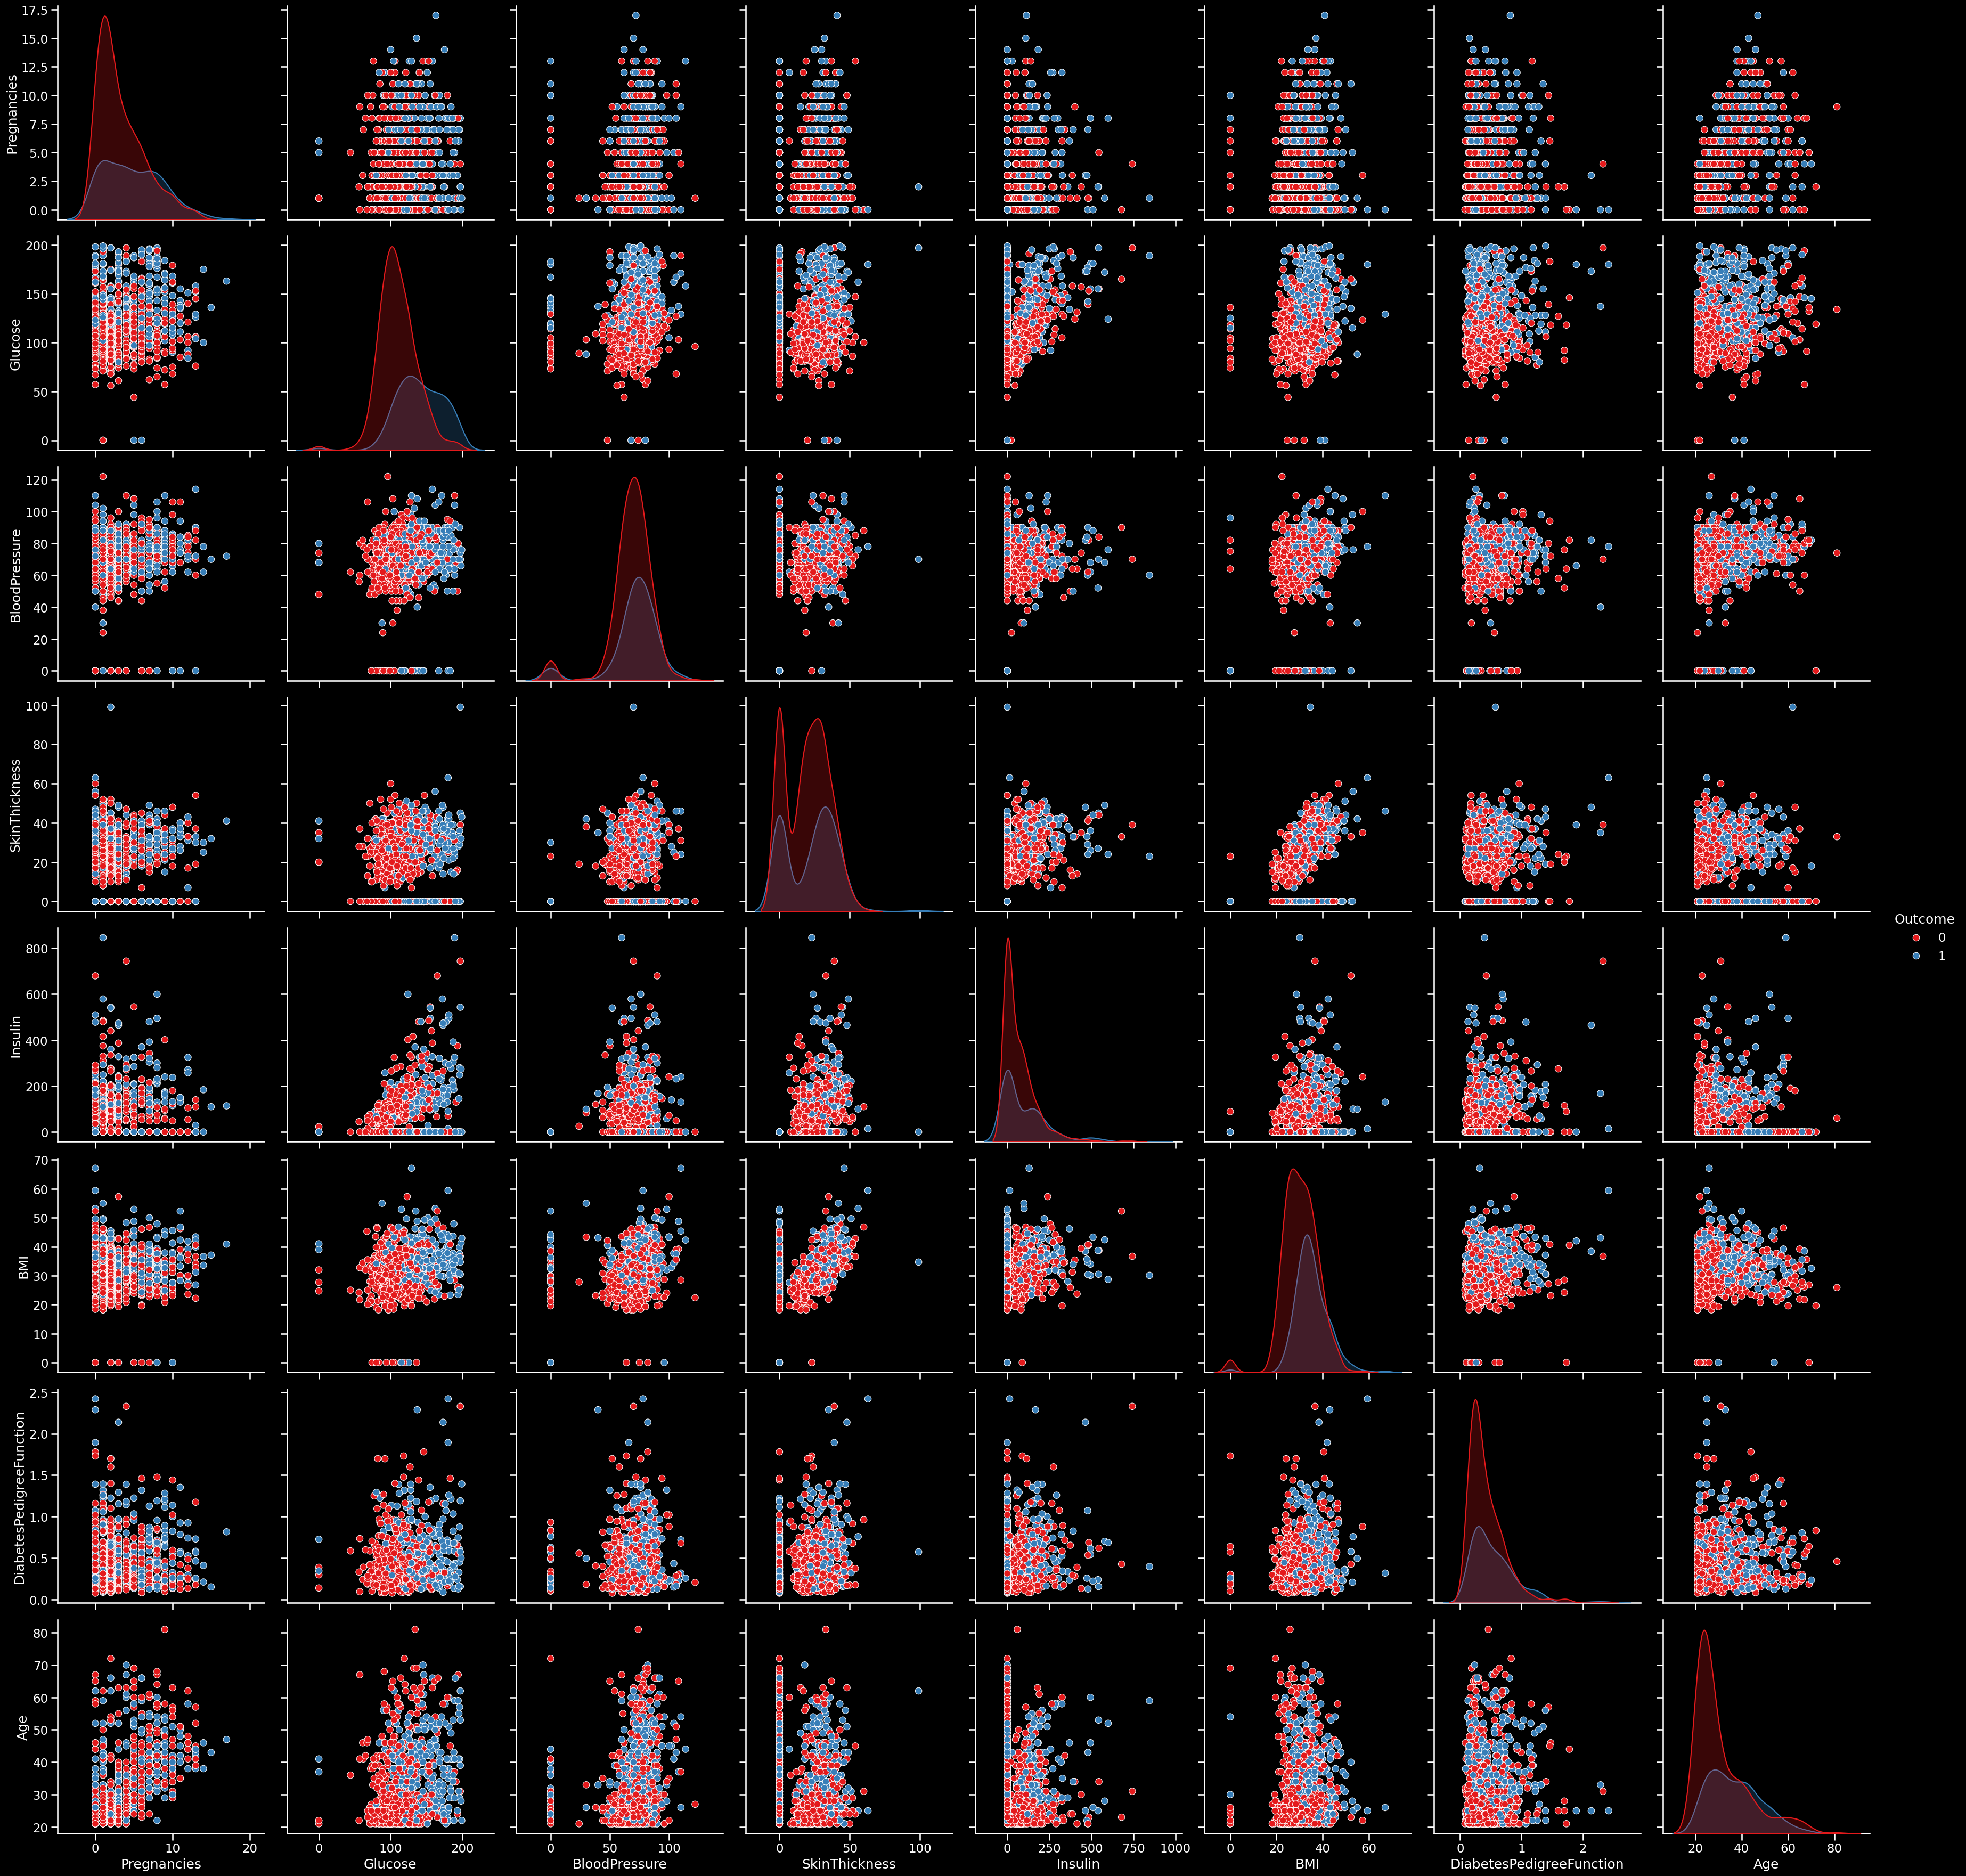

In [47]:
sns.pairplot(df,
             hue="Outcome",height=4.5,aspect=1,palette="Set1")

Now let's visualize the distribution of this new risk variable based on the outcome.

**Variables montrant une bonne séparation entre les classes :**

*   **Glucose :** Sur les histogrammes diagonaux, la distribution du Glucose pour le groupe diabétique (orange) est clairement décalée vers des valeurs plus élevées par rapport au groupe non diabétique (bleu). Sur les nuages de points, on observe une concentration de points orange (diabétiques) à des valeurs de Glucose plus élevées, quelle que soit l'autre variable. C'est l'un des prédicteurs les plus discriminants.
*   **BMI (Indice de Masse Corporelle) :** Similairement au Glucose, la distribution du BMI est plus élevée pour le groupe diabétique. Le nuage de points `BMI` vs. toute autre variable montre une tendance des points orange à se situer dans les zones de BMI plus élevés.
*   **Age :** La distribution de l'âge est également décalée vers des âges plus avancés pour les patients diabétiques. L'âge semble particulièrement discriminant en combinaison avec d'autres variables comme le Glucose.

**Variables qui se chevauchent fortement (pas très discriminantes seules) :**

*   **BloodPressure (Pression Artérielle) :** Les distributions de la pression artérielle se chevauchent considérablement entre les deux groupes. Bien qu'il y ait une légère tendance à des valeurs plus élevées chez les diabétiques, cette variable seule n'offre pas une grande capacité de séparation.
*   **SkinThickness (Épaisseur de la peau) :** L'épaisseur de la peau montre également un fort chevauchement. On observe beaucoup de valeurs de 0, en particulier chez les non diabétiques, ce qui complique l'interprétation directe de sa distribution seule.
*   **Insulin :** Malgré des valeurs d'insuline généralement plus élevées chez les diabétiques (au-delà des zéros), le chevauchement et le grand nombre de valeurs nulles (qui sont probablement des valeurs manquantes) rendent cette variable moins discriminante en l'état.
*   **DiabetesPedigreeFunction :** Bien que légèrement plus élevée en moyenne chez les diabétiques, la distribution de cette variable se chevauche fortement, limitant sa capacité à distinguer clairement les groupes seule.
*   **Pregnancies (Grossesses) :** Le nombre de grossesses est légèrement plus élevé chez les diabétiques, mais il y a un chevauchement important, surtout pour les faibles nombres de grossesses.

**Relations entre variables visibles (corrélations, clusters, tendances) :**

Les nuages de points révèlent des relations intéressantes entre les variables :

*   **Glucose vs. BMI :** Comme vu précédemment avec le scatter plot dédié, cette combinaison est très informative. Les diabétiques se concentrent dans les zones où Glucose et BMI sont élevés.
*   **Age vs. Pregnancies :** Il existe une corrélation positive visible ; les femmes plus âgées ont tendance à avoir eu plus de grossesses.
*   **SkinThickness vs. Insulin :** Ces deux variables montrent une corrélation positive. Les valeurs de 0 sont très apparentes dans ces deux variables, formant des groupes distincts sur les graphiques impliquant SkinThickness et Insulin.
*   **Glucose vs. Insulin :** On observe une corrélation positive, mais avec une grande dispersion due aux valeurs de 0 pour l'insuline.

**Résumé :**

Imaginez que nous observions ces patientes. Les patientes qui ont reçu un diagnostic de diabète (Outcome=1) se distinguent souvent des autres de plusieurs manières. Elles ont, en moyenne, des niveaux de **Glucose** plus élevés, un **Indice de Masse Corporelle (BMI)** plus important, et elles sont souvent plus **âgées**. Lorsque nous regardons les patientes avec un diagnostic de diabète, elles ont tendance à se regrouper dans des zones du graphique où ces trois caractéristiques (Glucose, BMI, Age) atteignent des valeurs plus élevées. Les autres variables comme la Pression Artérielle, l'épaisseur de la peau ou même l'insuline (à cause des nombreuses valeurs "zéro" qui masquent la vraie distribution) sont moins claires pour séparer les deux groupes par elles-mêmes. Cependant, des combinaisons comme un **Glucose élevé associé à un BMI élevé** sont particulièrement révélatrices et montrent clairement où se situent la plupart des patientes diabétiques. Le pairplot nous raconte l'histoire que le diabète dans cet échantillon est fortement associé à des marqueurs métaboliques (Glucose, BMI) et à l'âge.

### Préparer les données pour les algorithmes d'apprentissage automatique

Nos données présentent de nombreuses valeurs aberrantes ou manquantes : environ 49 % des observations contiennent au moins une information physiologiquement impossible (zéros pour certaines variables comme Glucose, BloodPressure, SkinThickness, Insulin ou BMI).
Pour corriger cela, la première étape consiste à remplacer ces zéros par des valeurs manquantes (NaN), ce qui permet ensuite d’appliquer des stratégies d’imputation adaptées à chaque variable afin de réparer les données et réduire le biais potentiel dans les analyses et modèles.

In [48]:
# -----------------------------
# Imports
# -----------------------------

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# -----------------------------
# 1️ Custom Transformers
# -----------------------------

# Remplacer 0 par NaN
class ZeroToNan(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Si DataFrame
        if hasattr(X, "columns"):
            X_copy = X.copy()
            X_copy[self.columns] = X_copy[self.columns].replace(0, np.nan)
            return X_copy
        # Si numpy array
        else:
            X_copy = X.copy()
            X_copy[:, self.columns] = np.where(X_copy[:, self.columns] == 0, np.nan, X_copy[:, self.columns])
            return X_copy

# Outlier capping (1er et 99e percentile)
class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        self.lower = X[self.columns].quantile(0.01)
        self.upper = X[self.columns].quantile(0.99)
        return self
    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = np.clip(X_copy[col], self.lower[col], self.upper[col])
        return X_copy

# -----------------------------
# 2️ Feature ratio Glucose/BMI
# -----------------------------
def column_ratio(X):
    X_np = X.to_numpy() if hasattr(X, "to_numpy") else X
    ratio = X_np[:, [0]] / X_np[:, [1]]
    ratio[np.isinf(ratio)] = np.nan  # sécurité: Inf → NaN
    return ratio

def ratio_name(function_trans, feature_names):
    return ["Glucose_BMI_ratio"]

def ratio_pipeline():
    return make_pipeline(
        ZeroToNan(columns=["Glucose","BMI"]),  # remplace 0 par NaN avant division
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        SimpleImputer(strategy='median'),
        FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
        StandardScaler()
    )

# -----------------------------
# 3️ Pipelines principaux
# -----------------------------
num_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
log_cols = ["SkinThickness", "Insulin", "DiabetesPedigreeFunction", "Age"]
ratio_cols = ["Glucose", "BMI"]
outlier_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Pipeline numérique simple
num_pipeline = Pipeline([
    ("zero_to_nan", ZeroToNan(columns=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"])),
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler())
])

# Pipeline log
log_pipeline = make_pipeline(
    ZeroToNan(columns=log_cols),
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler()
)

# Pipeline outliers
outlier_pipeline = Pipeline([
    ("capper", OutlierCapper(columns=outlier_cols))
])

# -----------------------------
# 4️ ColumnTransformer global
# -----------------------------
preprocessing = ColumnTransformer([
    ("outlier", outlier_pipeline, outlier_cols),
    ("num", num_pipeline, num_cols),
    ("log", log_pipeline, log_cols),
    ("ratio", ratio_pipeline(), ratio_cols)
])

# -----------------------------
# 5️ Train/Test Split
# -----------------------------
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 6️ Application du pipeline
# -----------------------------
X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed  = preprocessing.transform(X_test)

print("Shape X_train_processed:", X_train_processed.shape)
print("Shape X_test_processed:", X_test_processed.shape)


Shape X_train_processed: (614, 18)
Shape X_test_processed: (154, 18)


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


####

### Objectifs métier



---

**Objectif principal :**
Maximiser le **rappel (sensibilité)** sur la classe 1 (patients diabétiques). Dans un contexte médical, il est crucial de détecter un maximum de cas positifs pour réduire les **faux négatifs**, car chaque patient non détecté représente un risque de complications.

**Objectif secondaire :**
Maintenir une **précision correcte** pour limiter le nombre de **faux positifs**, ce qui évite de traiter inutilement des patients non diabétiques et réduit le stress ou les coûts associés à des diagnostics erronés.

**Seuils idéaux :**
Pour ce dataset, avec le nombre d’observations dont on dispose, une **précision ≥ 60 %** et un **rappel ≥ 80‑85 %** représentent un bon compromis. Cela permet de détecter la majorité des diabétiques tout en gardant le taux de faux positifs raisonnable.



* **Accuracy** peut être très trompeuse sur des classes déséquilibrées : ici, la majorité des patients sont non-diabétiques, donc un modèle qui prédit systématiquement 0 aurait une accuracy élevée mais ne détecterait aucun diabétique.
* **F1-score** combine précision et rappel, mais selon les priorités médicales, le **rappel est souvent plus critique que la précision** pour des maladies graves.


Se focaliser sur le **rappel** permet de minimiser le risque de laisser passer des cas positifs, tandis que la précision sert à limiter les erreurs sur les prédictions positives. L’équilibre entre ces deux métriques dépend du **contexte clinique** et du **nombre de patients** disponibles dans le dataset.


---


In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , VotingClassifier , BaggingClassifier , AdaBoostClassifier , GradientBoostingClassifier,StackingClassifier ,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score, confusion_matrix
import pandas as pd
import numpy as np

# -----------------------------
# Liste de modèles
# -----------------------------
models = [
    ("SVM RBF", SVC(kernel="rbf", random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(max_iter=5000, random_state=42)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Extra Trees", ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=42)),
    ("XGBoost", XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# -----------------------------
# Stratified K-Fold
# -----------------------------
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# -----------------------------
# DataFrame pour stocker les résultats
# -----------------------------
results = []

# -----------------------------
# Boucle sur chaque modèle
# -----------------------------
for name, model in models:
    acc_list = []
    f1_list = []
    precision_list = []
    recall_list = []
    specificity_list = []
    kappa_list = []

    # Boucle sur chaque fold
    for train_idx, val_idx in skf.split(X_train_processed, y_train):
        X_tr, X_val = X_train_processed[train_idx], X_train_processed[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Entraînement
        model.fit(X_tr, y_tr)

        # Prédiction
        y_pred = model.predict(X_val)

        # Matrice de confusion
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

        # Calcul métriques
        acc_list.append(accuracy_score(y_val, y_pred))
        f1_list.append(f1_score(y_val, y_pred))
        precision_list.append(precision_score(y_val, y_pred))
        recall_list.append(recall_score(y_val, y_pred))
        specificity_list.append(tn / (tn + fp))
        kappa_list.append(cohen_kappa_score(y_val, y_pred))

    # Moyenne sur les folds
    results.append({
        "Model": name,
        "Accuracy": np.mean(acc_list),
        "F1-score": np.mean(f1_list),
        "Precision": np.mean(precision_list),
        "Recall (Sensibilité)": np.mean(recall_list),
        "Specificity": np.mean(specificity_list),
        "Cohen Kappa": np.mean(kappa_list)
    })

# Convertir en DataFrame
results_df = pd.DataFrame(results)

# Afficher
results_df.sort_values(by="F1-score", ascending=False)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:48:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:48:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [20:48:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model  Accuracy  F1-score  Precision  Recall (Sensibilité)  \
2    Gradient Boosting  0.773569  0.656642   0.698480              0.621283   
3  Logistic Regression  0.780097  0.652882   0.726766              0.593310   
1        Random Forest  0.775235  0.649772   0.714744              0.598070   
7             AdaBoost  0.770373  0.644581   0.700415              0.598266   
6          Extra Trees  0.763813  0.635512   0.692152              0.588811   
8              XGBoost  0.736083  0.610125   0.635903              0.588745   
5        Decision Tree  0.700263  0.593842   0.565579              0.626304   
0              SVM RBF  0.760601  0.572196   0.758120              0.462702   
4                  KNN  0.719831  0.556455   0.628962              0.504825   

   Specificity  Cohen Kappa  
2     0.854936     0.488688  
3     0.879942     0.494340  
1     0.869899     0.486267  
7     0.862436     0.476650  
6     0.857386     0.462407  
8     0.814854     0.411186  
5     0.739872     0.357663  
0     0.919987     0.419947  
4     0.834961     0.355810

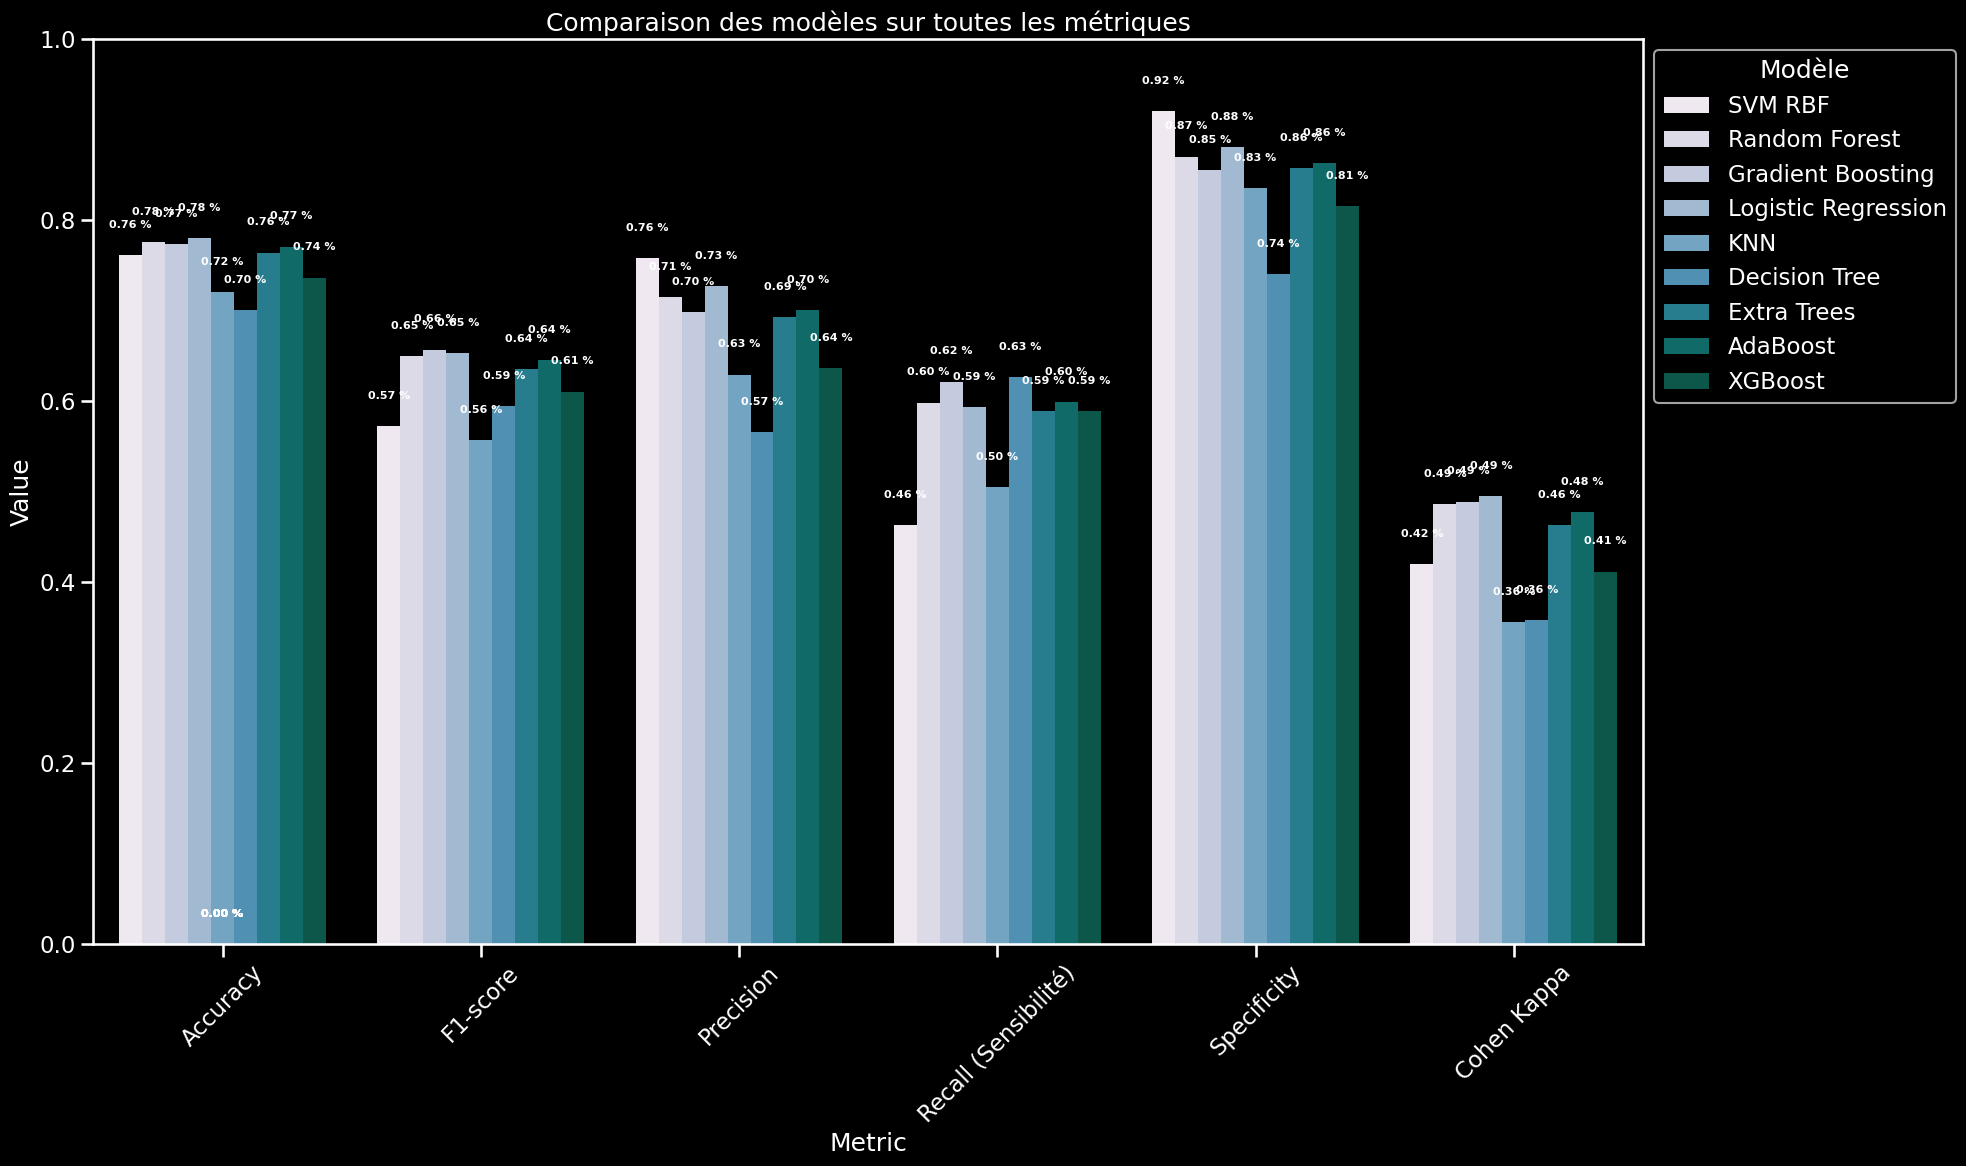

In [50]:
results_long = results_df.melt(id_vars="Model",
                               var_name="Metric",
                               value_name="Value")
plt.figure(figsize=(20,12))
bar = sns.barplot(data=results_long, x="Metric", y="Value", hue="Model", palette="PuBuGn")
plt.title("Comparaison des modèles sur toutes les métriques")
plt.legend(bbox_to_anchor=(1, 1), title="Modèle")
plt.xticks(rotation=45)

# Ajouter les valeurs au-dessus des barres
for patch in bar.patches:
    height = patch.get_height()
    bar.text(patch.get_x() + patch.get_width()/2., height + 0.03,  # léger offset
             f"{height:.2f} %", ha="center", fontsize=8,fontweight="bold")

plt.ylim(0,1)
plt.tight_layout()
plt.show()


## réglage du modéle de Régression logistique

#### Recherche par quadrillage

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix
full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid = [
    {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100,1000],
     'classifier__penalty': ['l1','l2'],
     'classifier__solver':["liblinear"],
    'classifier__class_weight': [None, "balanced",{0:1, 1:3}, {0:1, 1:5},{0:1,1:10}]}
    ]


grid_search = GridSearchCV(
    full_pipeline,
    param_grid,
    cv=3,
    scoring='f1',  # F1-score pour la classe 1
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall-score:", grid_search.best_score_)
print(classification_report(y_train, grid_search.predict(X_train)))
print("f1 score" , accuracy_score(y_train, grid_search.predict(X_train)))

Best parameters: {'classifier__C': 10, 'classifier__class_weight': {0: 1, 1: 3}, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best recall-score: 0.6966500085664332
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       400
           1       0.61      0.87      0.72       214

    accuracy                           0.76       614
   macro avg       0.76      0.79      0.75       614
weighted avg       0.81      0.76      0.77       614

f1 score 0.760586319218241


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [54]:
print("Accuracy score" , accuracy_score(y_train, grid_search.predict(X_train)))


Accuracy score 0.760586319218241


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


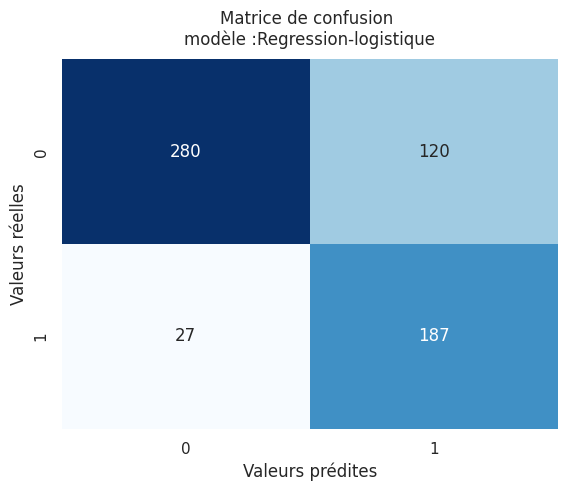

In [56]:
matrix = confusion_matrix(y_train, grid_search.predict(X_train))
sns.set_theme()
sns.heatmap(matrix,annot=True,fmt=".3g",cmap="Blues",cbar=False)
plt.title("Matrice de confusion \nmodèle :Regression-logistique",pad=10)
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()

Le meilleur modèle de régression logistique atteint un F1-score de 0.72, soit +0.6 point par rapport au modèle initial.
La précision a fortement baissé (>10 %), mais le recall a augmenté de 3 %.
Cela signifie que le modèle génère plus de faux positifs, mais détecte mieux les diabétiques (moins de faux négatifs).
Étant donné l’importance de détecter la maladie, ce compromis est acceptable.
Nous allons maintenant pousser l’optimisation en utilisant Bayesian Optimization pour maximiser le recall et améliorer encore la détection

In [58]:
pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.9 MB/s eta 0:00:00


In [59]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical,Integer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
# Pipeline complet
full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Définition de l'espace des hyperparamètres
param_space = {
    'classifier__C': Real(0.001, 100, prior='log-uniform'),
    'classifier__penalty': Categorical(['l1','l2']),
    'classifier__solver': Categorical(['liblinear']),  # adapté à l1/l2
    'classifier__class_weight': Categorical([None,'balanced'])
}

# BayesSearchCV
opt = BayesSearchCV(
    full_pipeline,
    search_spaces=param_space,
    n_iter=30,          # nombre d'itérations bayésiennes
    cv=3,
    scoring='recall',   # on maximise le recall pour la classe 1
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entraînement
opt.fit(X_train, y_train)

# Résultats
print("Best parameters:", opt.best_params_)
print("Best recall-score:", opt.best_score_)
print(classification_report(y_train, opt.predict(X_train)))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, np.str_('balanced'), np.str_('l1'), np.str_('liblinear')] before, using random point [0.06537716850927343, 'balanced', 'l2', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, np.str_('balanced'), np.str_('l1'), np.str_('liblinear')] before, using random point [57.60712098350793, 'balanced', 'l1', 'liblinear']
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


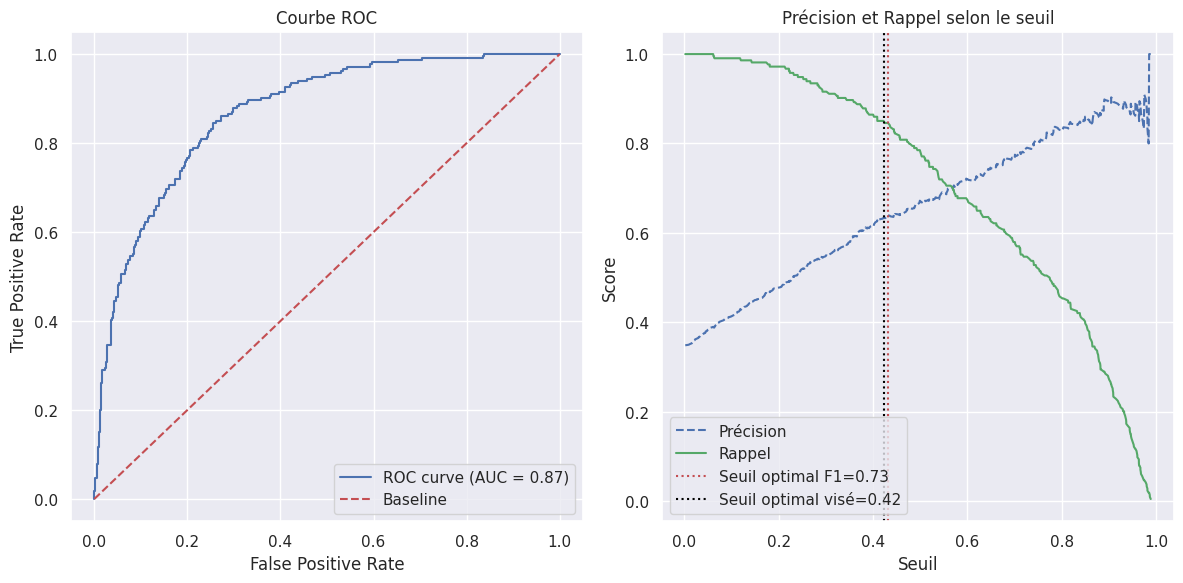

In [61]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Prédictions
# Probabilités prédites pour la classe 1
y_probs = opt.predict_proba(X_train)[:, 1]

# Courbe ROC
fpr, tpr, roc_thresholds = roc_curve(y_train, y_probs)
roc_auc = auc(fpr, tpr)

# Courbe précision-rappel
precisions, recalls, pr_thresholds = precision_recall_curve(y_train, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = f1_scores.argmax()
best_threshold = pr_thresholds[best_idx]
best_f1 = f1_scores[best_idx]
choix_manuel = 0.422465  # vooci chunck suivant

# Tracé
plt.figure(figsize=(12,6))

# Subplot 1 : ROC
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--', label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.grid(True)

# Subplot 2 : Précision-Rappel
plt.subplot(1,2,2)
plt.plot(pr_thresholds, precisions[:-1], 'b--', label="Précision")
plt.plot(pr_thresholds, recalls[:-1], 'g-', label="Rappel")
plt.axvline(best_threshold, color='r', linestyle=':', label=f"Seuil optimal F1={best_f1:.2f}")
plt.axvline(choix_manuel, color='black', linestyle=':', label=f"Seuil optimal visé={0.422465:.2f}")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.title("Précision et Rappel selon le seuil")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [63]:
Seuils =pd.DataFrame({"Thresholds":pr_thresholds,"Rappel":recalls[:-1],"Précision":precisions[:-1]})
# len(thresholds),len(recalls),len(precisions)

Seuils[Seuils["Rappel"] >=0.85].sort_values(by="Précision",ascending=False).head(2)
#0.422465	0.850467	0.634146


Thresholds    Rappel  Précision
327    0.422465  0.850467   0.634146
326    0.421003  0.850467   0.631944

In [64]:
seuils = 0.422465
y_pred = (opt.predict_proba(X_train)[:,1] >= seuils).astype(int)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       400
           1       0.63      0.85      0.73       214

    accuracy                           0.78       614
   macro avg       0.77      0.79      0.77       614
weighted avg       0.81      0.78      0.78       614



/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


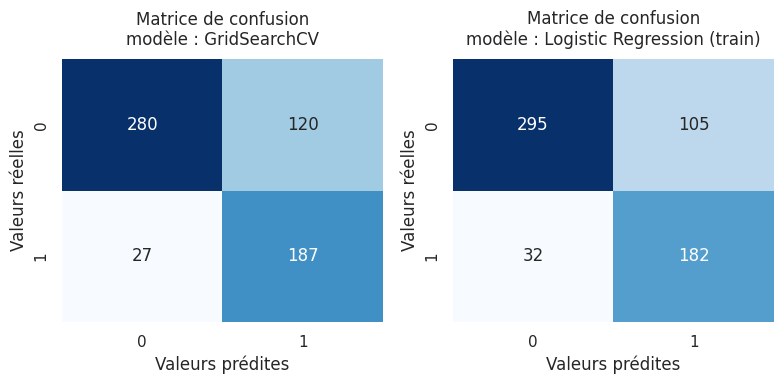

In [65]:

# Confusion matrices
Matrix_train = confusion_matrix(y_train, y_pred)
Matrix_grid = confusion_matrix(y_train, grid_search.predict(X_train))

sns.set_theme()

# Figure avec 2 sous-plots
f, ax = plt.subplots(1, 2, figsize=(8, 4))

# Heatmap pour y_pred
sns.heatmap(Matrix_train, annot=True, fmt=".3g", cmap="Blues", cbar=False, ax=ax[1])
ax[1].set_title("Matrice de confusion\nmodèle : Logistic Regression (train)", pad=10)
ax[1].set_xlabel("Valeurs prédites")
ax[1].set_ylabel("Valeurs réelles")

# Heatmap pour GridSearch
sns.heatmap(Matrix_grid, annot=True, fmt=".3g", cmap="Blues", cbar=False, ax=ax[0])
ax[0].set_title("Matrice de confusion\nmodèle : GridSearchCV", pad=10)
ax[0].set_xlabel("Valeurs prédites")
ax[0].set_ylabel("Valeurs réelles")

plt.tight_layout()
plt.show()


Après avoir ajusté manuellement le seuil, notre modèle détecte 85 % des diabétiques contre 80 % précédemment. Cette modification entraîne une légère baisse de précision de 2 %, qui reste à 63 % : dans 63 % des cas, les patients prédits comme diabétiques le sont réellement. Ce compromis privilégie la détection des cas positifs, essentielle dans un contexte médical pour réduire les faux négatifs.

Voyons voir maintenant es ce que le modéle généralise ou bien au contraire elle est en overfiting (sur-ajustement)

In [66]:
y_pred = opt.predict(X_test)
print("Évaluation sur le jeu de validation")
print()
print("----------------------------------------------------------------------------------")

print("Sans seuil défini")
print(classification_report(y_test, y_pred))
print("----------------------------------------------------------------------------------")
print()
y_pred_seuil = opt.predict_proba(X_test)[:,1] >= seuils
print("Avec le seuil défini sur le train_set")
print(classification_report(y_test, y_pred_seuil))

Évaluation sur le jeu de validation

----------------------------------------------------------------------------------
Sans seuil défini
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       100
           1       0.62      0.74      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154

----------------------------------------------------------------------------------

Avec le seuil défini sur le train_set
              precision    recall  f1-score   support

           0       0.88      0.68      0.77       100
           1       0.58      0.83      0.69        54

    accuracy                           0.73       154
   macro avg       0.73      0.76      0.73       154
weighted avg       0.78      0.73      0.74       154



/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(



---

### 1️ Sans ajustement du seuil

* Rappel 74 % pour la classe 1 (diabétiques) → 74 % des diabétiques sont détectés.
* Précision 62 % → parmi les prédictions positives, 62 % sont correctes.
* F1-score 0.67 → compromis modéré entre rappel et précision.

### 2️ Avec seuil ajusté

* Rappel 83 % pour les diabétiques → amélioration de la détection (+9 %).
* Précision 58 % → légère baisse (-4 %), plus de faux positifs.
* F1-score 0.69 → gain net grâce à l’augmentation du rappel.

###  Conclusion

* Le **réglage du seuil** améliore la détection des diabétiques, ce qui est crucial dans un contexte médical, même au prix d’une légère baisse de précision.
* Le modèle **généralise correctement** sur le jeu de validation : rappel et précision restent cohérents avec les performances sur le train.

---



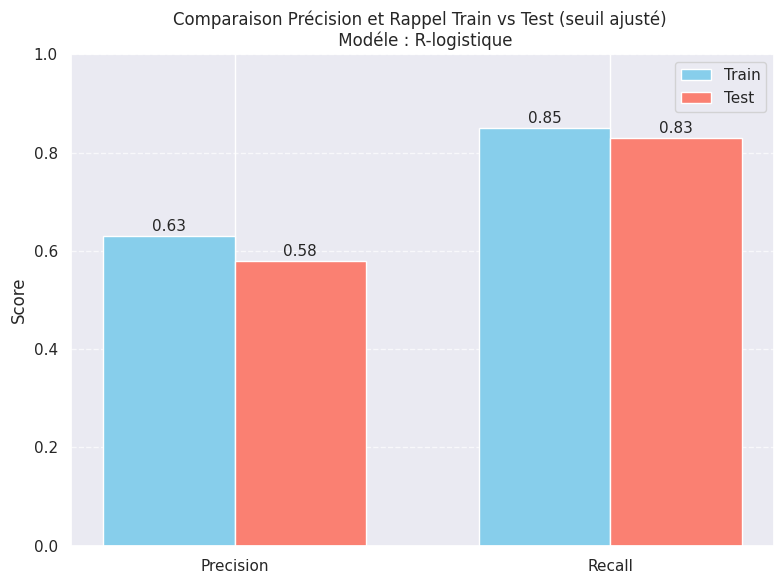

In [67]:


# Scores pour train et test
metrics = ['Precision', 'Recall']
train_scores = [0.63, 0.85]  # train, seuil ajusté
test_scores  = [0.58, 0.83]  # test, seuil ajusté

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, train_scores, width, label='Train', color='skyblue')
plt.bar(x + width/2, test_scores, width, label='Test', color='salmon')

# Annoter les valeurs
for i, val in enumerate(train_scores):
    plt.text(i - width/2, val + 0.01, f"{val:.2f}", ha='center', fontsize=11)
for i, val in enumerate(test_scores):
    plt.text(i + width/2, val + 0.01, f"{val:.2f}", ha='center', fontsize=11)

plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Comparaison Précision et Rappel Train vs Test (seuil ajusté) \n Modéle : R-logistique")
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# ## sauvegarde du modele de regression_logistiQue
# import joblib
# joblib.dump(opt, 'Regression_logistique.pkl')

# Xgbboost

#### Réglage du modéle

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from skopt.space import Real, Integer

full_pipeline_xgb = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],            # Nombre d'arbres
    'classifier__learning_rate': [0.01, 0.05, 0.1],         # Learning rate (vitesse de cvg DG)
    'classifier__max_depth': [3, 4, 5,10,15],                     # Profondeur des arbres
    'classifier__subsample': [0.7, 0.8, 1.0],               # Fraction d’échantillons par arbre
    'classifier__colsample_bytree': [0.7, 0.8, 1.0],        # Fraction de features par arbre
    'classifier__gamma': [0, 0.1, 0.2],                     # Regularisation sur les splits
    'classifier__reg_alpha': [0, 0.01, 0.1],                # L1 regularization
    'classifier__reg_lambda': [1, 1.5, 2]                   # L2 regularization
}

random_grid_xgb_search = RandomizedSearchCV(
    full_pipeline_xgb,
    param_grid,
    n_iter=50,
    cv=3,
    scoring="recall",   # On maximise le rappel pour détecter le diabète
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entraînement
random_grid_xgb_search.fit(X_train, y_train)

# Résultats
print("Best parameters:", random_grid_xgb_search.best_params_)
print("Best recall-score:", random_grid_xgb_search.best_score_)



# Espace des hyperparamètres valides pour XGBClassifier
param_space = {
    'classifier__n_estimators': Integer(50, 300),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'classifier__max_depth': Integer(2, 15),
    'classifier__subsample': Real(0.6, 1.0),
    'classifier__colsample_bytree': Real(0.6, 1.0),
    'classifier__gamma': Real(0, 0.5),
    'classifier__reg_alpha': Real(0, 0.1),
    'classifier__reg_lambda': Real(1, 2)
}

# BayesSearchCV
opt_xgb = BayesSearchCV(
    full_pipeline_xgb,
    search_spaces=param_space,
    n_iter=30,
    cv=3,
    scoring='recall',   # on maximise le rappel pour détecter le diabète
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entraînement
opt_xgb.fit(X_train, y_train)

# Résultats
print("Best parameters:", opt_xgb.best_params_)
print("Best recall-score:", opt_xgb.best_score_)


Best parameters: {'classifier__subsample': 0.8, 'classifier__reg_lambda': 2, 'classifier__reg_alpha': 0.1, 'classifier__n_estimators': 200, 'classifier__max_depth': 15, 'classifier__learning_rate': 0.05, 'classifier__gamma': 0, 'classifier__colsample_bytree': 0.8}
Best recall-score: 0.6030255607720396
Best parameters: OrderedDict({'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0.5, 'classifier__learning_rate': 0.05942981662038004, 'classifier__max_depth': 10, 'classifier__n_estimators': 228, 'classifier__reg_alpha': 0.1, 'classifier__reg_lambda': 1.2946376335445016, 'classifier__subsample': 0.6})
Best recall-score: 0.6030255607720396


La recherche des meilleurs hyperparamètres via Bayesienne et RandomizedSearchCV a donné des résultats très proches.
Nous choisissons finalement les paramètres issus de la recherche aléatoire car ils offrent des performances légèrement supérieures en rappel sur la classe 1 (diabète), ce qui est notre objectif principal.
Cette approche nous permet de maximiser la détection des patients diabétiques tout en conservant une précision acceptable pour limiter les faux positifs.
Ainsi, le modèle final sera celui entraîné avec ces paramètres issus de la recherche aléatoire.

In [70]:
print(classification_report(y_train, random_grid_xgb_search.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Même si le modèle affiche des performances spectaculaires sur le jeu d’entraînement, cela confirme en réalité un sur-ajustement. Il a mémorisé ses données d’entraînement plutôt que d’apprendre des règles généralisables, ce qui se traduit par une précision et un rappel artificiellement élevés. L’évaluation sur un jeu de validation reste indispensable pour mesurer sa vraie capacité à détecter le diabète sur des patients jamais vus.

Mais avant cela essayons de réduire le sur-ajustement en régularisant le modèle

*

In [128]:


param_space = {
    'classifier__n_estimators': Integer(50, 300),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'classifier__max_depth': Integer(2, 20),
    'classifier__subsample': Real(0.6, 1.0),
    'classifier__colsample_bytree': Real(0.6, 1.0),
    'classifier__gamma': Real(0, 0.5),
    'classifier__reg_alpha': Real(0, 1.0),   # Augmenté pour plus de L1
    'classifier__reg_lambda': Real(1, 5),    # Augmenté pour plus de L2
    'classifier__min_child_weight': Integer(1, 10)  # Nouveau paramètre pour régularisation
}

opt_xgb = BayesSearchCV(
    full_pipeline_xgb,
    search_spaces=param_space,
    n_iter=50,
    n_points=10,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

opt_xgb.fit(X_train, y_train)

print("Best parameters:", opt_xgb.best_params_)
print("Best recall-score:", opt_xgb.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: OrderedDict({'classifier__colsample_bytree': 0.8290116443832669, 'classifier__gamma': 0.24706627946014886, 'classifier__learning_rate': 0.061078071587252904, 'classifier__max_depth': 7, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 92, 'classifier__reg_alpha': 0.560910503570542, 'classifier__reg_lambda': 3.4725759218054706, 'classifier__subsample': 0.9822126559627715})
Best recall-score: 0.6449612403100775


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:08:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [137]:


param_space = {
    'classifier__n_estimators': Integer(50, 1000),
    'classifier__learning_rate': Real(0.001, 0.1, prior='log-uniform'),
    'classifier__max_depth': Integer(2, 12),   # réduit pour limiter surajustement
    'classifier__subsample': Real(0.6, 1.0),
    'classifier__colsample_bytree': Real(0.6, 1.0),
    'classifier__gamma': Real(0, 1.0),
    'classifier__reg_alpha': Real(0,5.0),
    'classifier__reg_lambda': Real(1, 5),
    'classifier__min_child_weight': Integer(1, 10)
    # 'classifier__scale_pos_weight': Real(0.5, 5.0)  # utile si dataset déséquilibré
}


opt_xgb = BayesSearchCV(
    full_pipeline_xgb,
    search_spaces=param_space,
    n_iter=50,
    n_points=5,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

opt_xgb.fit(X_train, y_train)

print("Best parameters:", opt_xgb.best_params_)
print("Best recall-score:", opt_xgb.best_score_)
#Best parameters: OrderedDict({'classifier__colsample_bytree': 1.0, 'classifier__gamma': 0.5, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 2, 'classifier__min_child_weight': 10, 'classifier__n_estimators': 50, 'classifier__reg_alpha': 1.0, 'classifier__reg_lambda': 5.0, 'classifier__scale_pos_weight': 5.0, 'classifier__subsample': 0.6})
# Best recall-score: 1.0

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:12:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: OrderedDict({'classifier__colsample_bytree': 1.0, 'classifier__gamma': 1.0, 'classifier__learning_rate': 0.006113303836119555, 'classifier__max_depth': 5, 'classifier__min_child_weight': 2, 'classifier__n_estimators': 660, 'classifier__reg_alpha': 0.0, 'classifier__reg_lambda': 5.0, 'classifier__subsample': 0.6})
Best recall-score: 0.6514452094090648


In [138]:
pd.DataFrame(opt_xgb.cv_results_).sort_values(by="rank_test_score").head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
26       0.791615      0.011786         0.043784        0.002886   
48       0.366198      0.062674         0.042194        0.003042   
28       0.218047      0.014197         0.042043        0.001905   
49       0.822047      0.130622         0.042638        0.009738   
0        0.333421      0.057540         0.063699        0.028126   
35       0.599969      0.010013         0.045391        0.005730   
37       0.560098      0.144023         0.049179        0.011750   
40       0.187067      0.012577         0.042667        0.007455   
45       0.335387      0.016918         0.044620        0.003980   
15       0.649243      0.134114         0.069893        0.024447   

    param_classifier__colsample_bytree  param_classifier__gamma  \
26                            1.000000                 1.000000   
48                            1.000000                 0.767752   
28                            1.000000                 0.000000   
49                            1.000000                 0.000000   
0                             0.764042                 0.727726   
35                            1.000000                 0.000000   
37                            1.000000                 1.000000   
40                            1.000000                 1.000000   
45                            1.000000                 1.000000   
15                            0.873053                 0.889177   

    param_classifier__learning_rate  param_classifier__max_depth  \
26                         0.006113                            5   
48                         0.100000                            2   
28                         0.052591                            2   
49                         0.021023                           12   
0                          0.073407                            5   
35                         0.030327                            2   
37                         0.019824                            2   
40                         0.034922                            2   
45                         0.061086                            6   
15                         0.032353                            6   

    param_classifier__min_child_weight  param_classifier__n_estimators  ...  \
26                                   2                             660  ...   
48                                  10                             820  ...   
28                                  10                             407  ...   
49                                   1                             555  ...   
0                                    7                             443  ...   
35                                   1                            1000  ...   
37                                   1                             691  ...   
40                                   1                             219  ...   
45                                   1                             223  ...   
15                                   7                            1000  ...   

    param_classifier__subsample  \
26                     0.600000   
48                     0.600000   
28                     0.600000   
49                     0.600000   
0                      0.721785   
35                     0.600000   
37                     0.600000   
40                     0.600000   
45                     0.600000   
15                     0.807090   

                                               params  split0_test_score  \
26  {'classifier__colsample_bytree': 1.0, 'classif...           0.595238   
48  {'classifier__colsample_bytree': 1.0, 'classif...           0.651685   
28  {'classifier__colsample_bytree': 1.0, 'classif...           0.604651   
49  {'classifier__colsample_bytree': 1.0, 'classif...           0.578313   
0   {'classifier__colsample_bytree': 0.76404158354...           0.581395   
35  {'classifier__colsample_bytree': 1.0, 'classif...   

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


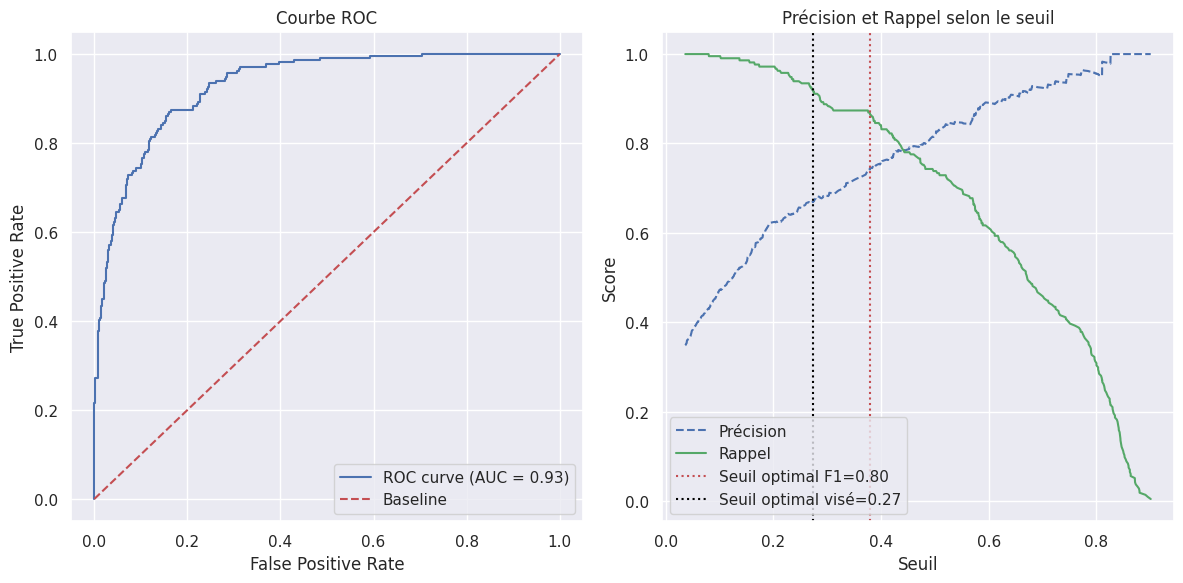

In [165]:

# Probabilités prédites pour la classe 1
y_probs = opt_xgb.predict_proba(X_train)[:, 1]

# Courbe ROC
fpr, tpr, roc_thresholds = roc_curve(y_train, y_probs)
roc_auc = auc(fpr, tpr)

# Courbe précision-rappel
precisions, recalls, pr_thresholds = precision_recall_curve(y_train, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = f1_scores.argmax()
best_threshold = pr_thresholds[best_idx]
best_f1 = f1_scores[best_idx]
choix_manuel =0.273939  # vooci chunck suivant

# Tracé
plt.figure(figsize=(12,6))

# Subplot 1 : ROC
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--', label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.grid(True)

# Subplot 2 : Précision-Rappel
plt.subplot(1,2,2)
plt.plot(pr_thresholds, precisions[:-1], 'b--', label="Précision")
plt.plot(pr_thresholds, recalls[:-1], 'g-', label="Rappel")
plt.axvline(best_threshold, color='r', linestyle=':', label=f"Seuil optimal F1={best_f1:.2f}")
plt.axvline(choix_manuel, color='black', linestyle=':', label=f"Seuil optimal visé={choix_manuel:.2f}")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.title("Précision et Rappel selon le seuil")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [162]:
Seuils_xgb = pd.DataFrame({"Thresholds":pr_thresholds,"Rappel":recalls[:-1],"Précision":precisions[:-1]})
# Seuils_xgb[Seuils_xgb["Rappel"] >=0.85].sort_values(by="Précision",ascending=False).head(2)
seuil_xgb = 0.273939
# Thresholds	Rappel	Précision
# 0.696434	0.813084	0.632727
Seuils_xgb[Seuils_xgb["Rappel"] >=0.90].sort_values(by="Précision",ascending=False).head(10)


Thresholds    Rappel  Précision
328    0.281305  0.911215   0.681818
329    0.285451  0.906542   0.680702
330    0.286536  0.901869   0.679577
327    0.278791  0.911215   0.679443
326    0.278767  0.911215   0.677083
325    0.276489  0.911215   0.674740
323    0.275302  0.915888   0.673540
324    0.276167  0.911215   0.672414
322    0.274967  0.915888   0.671233
320    0.273939  0.920561   0.670068

In [ ]:
# full_pipeline_xgb2.fit(X_train,y_train)

In [163]:
y_pred_train_xgb = opt_xgb.predict(X_train)
print("----------------------------------------------------------------------------------")
print(classification_report(y_train, y_pred_train_xgb))
print("----------------------------------------------------------------------------------")
print()
y_pred_train_xgb_seuil = opt_xgb.predict_proba(X_train)[:,1] >= seuil_xgb
print("Avec le seuil défini sur le train_set")
print(classification_report(y_train, y_pred_train_xgb_seuil))
print("----------------------------------------------------------------------------------")


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


----------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       400
           1       0.82      0.74      0.78       214

    accuracy                           0.85       614
   macro avg       0.85      0.83      0.83       614
weighted avg       0.85      0.85      0.85       614

----------------------------------------------------------------------------------

Avec le seuil défini sur le train_set
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       400
           1       0.67      0.92      0.77       214

    accuracy                           0.81       614
   macro avg       0.81      0.84      0.81       614
weighted avg       0.85      0.81      0.82       614

----------------------------------------------------------------------------------


In [ ]:

# plt.figure(figsize=(10,6))
# plt.plot(train_size, train_scores.mean(axis=1), label="Train")
# plt.plot(train_size, valid_scores.mean(axis=1), label="Valid")
# plt.xlabel("Taille de l'ensemble d'entraînement")
# plt.ylabel("Rappel")
# plt.title("Courbe d'apprentissage")
# plt.legend()
# plt.grid(True)
# plt.show()


In [164]:
y_pred_test_xgb = opt_xgb.predict(X_test)
print(classification_report(y_test, y_pred_test_xgb))
print("----------------------------------------------------------------------------------")
print()
y_pred_test_xgb_seuil = opt_xgb.predict_proba(X_test)[:,1] >= seuil_xgb
print("Avec le seuil défini sur le train_set")
print(classification_report(y_test, y_pred_test_xgb_seuil))
print("----------------------------------------------------------------------------------")
print("Seuil qui maximise f1")
y_pred_test_xgb_seuil_f1 = opt_xgb.predict_proba(X_test)[:,1] >= best_threshold
print(classification_report(y_test, y_pred_test_xgb_seuil_f1))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

----------------------------------------------------------------------------------

Avec le seuil défini sur le train_set
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.61      0.85      0.71        54

    accuracy                           0.75       154
   macro avg       0.75      0.78      0.75       154
weighted avg       0.79      0.75      0.76       154

----------------------------------------------------------------------------------
Seuil qui maximise f1
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       100
          

/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


# GBoosting Classifier

In [ ]:


# Pipeline complet
full_pipeline_gb = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Définition de l'espace des hyperparamètres
param_space = {
    'classifier__n_estimators': Integer(50, 1000),
    'classifier__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'classifier__max_depth': Integer(2, 12),
    'classifier__min_samples_split': Integer(2, 10),
    'classifier__min_samples_leaf': Integer(1, 10),
    'classifier__subsample': Real(0.6, 1.0),
    'classifier__max_features': Real(0.5, 1.0)
}

# BayesSearchCV
opt_gb = BayesSearchCV(
    full_pipeline_gb,
    search_spaces=param_space,
    n_iter=30,          # nombre d’itérations bayésiennes
    n_points=10,        # nombre de points par itération
    cv=5,
    scoring='f1',   # on maximise le rappel pour la classe 1 (diabète)
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entraînement
opt_gb.fit(X_train, y_train)

# Meilleurs paramètres et performance
print("Best parameters:", opt_gb.best_params_)
print("Best recall-score:", opt_gb.best_score_)
#{'classifier__learning_rate': 0.29999999999999993, 'classifier__max_depth': 6, 'classifier__max_features': 1.0, 'classifier__min_samples_leaf': 7, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 271, 'classifier__subsample': 1.0}
#{'classifier__learning_rate': 0.045401641878176635, 'classifier__max_depth': 28, 'classifier__max_features': 0.5524295792763518, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 163, 'classifier__subsample': 0.6621792216202174}


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


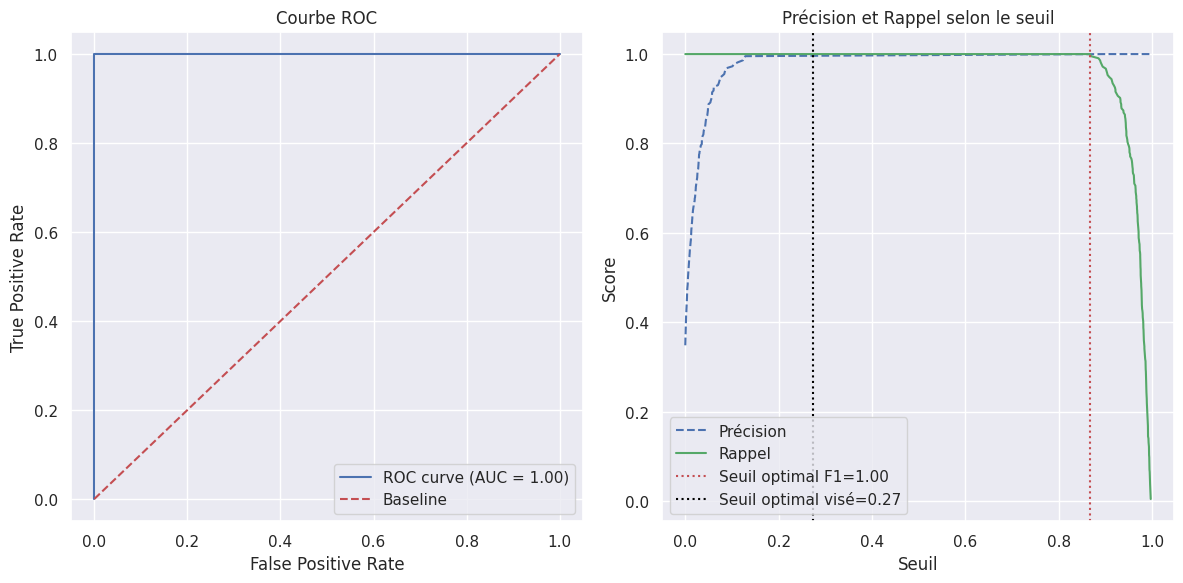

In [167]:

# Probabilités prédites pour la classe 1
y_probs = opt_gb.predict_proba(X_train)[:, 1]

# Courbe ROC
fpr, tpr, roc_thresholds = roc_curve(y_train, y_probs)
roc_auc = auc(fpr, tpr)

# Courbe précision-rappel
precisions, recalls, pr_thresholds = precision_recall_curve(y_train, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = f1_scores.argmax()
best_threshold = pr_thresholds[best_idx]
best_f1 = f1_scores[best_idx]
choix_manuel =0.273939  # vooci chunck suivant

# Tracé
plt.figure(figsize=(12,6))

# Subplot 1 : ROC
plt.subplot(1,2,1)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],'r--', label="Baseline")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.grid(True)

# Subplot 2 : Précision-Rappel
plt.subplot(1,2,2)
plt.plot(pr_thresholds, precisions[:-1], 'b--', label="Précision")
plt.plot(pr_thresholds, recalls[:-1], 'g-', label="Rappel")
plt.axvline(best_threshold, color='r', linestyle=':', label=f"Seuil optimal F1={best_f1:.2f}")
plt.axvline(choix_manuel, color='black', linestyle=':', label=f"Seuil optimal visé={choix_manuel:.2f}")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.title("Précision et Rappel selon le seuil")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Pipeline complet avec preprocessing
rf_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Grille d'hyperparamètres
param_grid = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearch avec StratifiedKFold
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='f1',   # On peut aussi mettre 'roc_auc' ou 'accuracy'
    n_jobs=-1,
    verbose=2
)

# Lancer le tuning
grid_search.fit(X_train, y_train)

# Meilleurs paramètres et score
print("Best params:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)



In [ ]:
print(classification_report(y_test, grid_search.predict(X_test)))


### Optimisation  bayésien

####

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical


# Pipeline avec preprocessing
rf_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Espace des hyperparamètres
param_space = {
    'classifier__n_estimators': Integer(50, 500),
    'classifier__max_depth': Integer(3, 20),
    'classifier__min_samples_split': Integer(2, 20),
    'classifier__min_samples_leaf': Integer(1, 10),
    'classifier__max_features': Categorical(['sqrt', 'log2', None])
}

# BayesSearchCV
bayes_search = BayesSearchCV(
    rf_pipeline,
    search_spaces=param_space,
    n_iter=30,  # nombre d'itérations
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',  # ou 'roc_auc', 'recall'
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Lancer l’optimisation
bayes_search.fit(X_train, y_train)

# Meilleurs paramètres et score
print("Best params:", bayes_search.best_params_)
print("Best F1-score:", bayes_search.best_score_)


In [ ]:


# Pipeline complet
log_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Espace de recherche bayésien
param_space = {
    'classifier__C': Real(0.01, 100, prior='log-uniform'),
    'classifier__penalty': Categorical(['l1', 'l2']),
    'classifier__solver': Categorical(['liblinear', 'saga'])
}

# BayesSearchCV
bayes_search = BayesSearchCV(
    log_pipeline,
    search_spaces=param_space,
    n_iter=30,  # nombre d’itérations
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',  # optimiser le F1-score pour la classe 1
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Lancer l’optimisation
bayes_search.fit(X_train, y_train)

# Meilleurs paramètres et score
print("Best params:", bayes_search.best_params_)
print("Best F1-score:", bayes_search.best_score_)


In [ ]:
print(classification_report(y_train, bayes_search.predict(X_train)))
# print(classification_report(y_test, bayes_search.predict(X_test)))
